# **The Statistical Home Advantage: An EDA on How Statistics Shift in the NBA**

This project investigates whether NBA teams and players show statistically significant differences in performance when playing at home versus away. Rather than assuming a home-court advantage, we use exploratory data analysis and statistical testing to determine which specific metrics meaningfully change based on venue.

The analysis focuses on comparing home and away distributions for key statistics, including:

- **Points**
- **Rebounds**
- **Assists**
- **Shooting efficiency**
- **Free throw attempts**
- **Plus/minus**

By identifying which factors shift significantly, and which remain consistent, we aim to quantify the true statistical impact of game location on both team-level and player-level performance.


*Authors:*
- *GONZALES, Joshua Nicolai*
- *REYES, Nathaniel Kurt*

---

## **Dataset Description**

This dataset contains detailed information about NBA games from the 2004 season up until the 2022 season. We will be focusing on two (2) key datasets namely:

- `games.csv` - A dataset of every game played from 2004-2022, containing detailed info about the stats of both the home and away teams.
- `games_details.csv` - A dataset of every game played from 2004-2022, detailing each player's stats for each of those games.

### **Dataset Collection:**
The dataset was obtained from kaggle [https://www.kaggle.com/datasets/nathanlauga/nba-games], which was collected from the original NBA [https://www.nba.com/stats] site.

### **Structure of the Data**  
* **Format**: Tabular data with game-level and player-level statistics across multiple CSV files.
* **Features**: Columns include game metadata, team performance metrics, player statistics, and game outcomes.

### **Description of Variables**

### **games.csv** - Game-Level Statistics
* **Unit of Analysis**: Each row represents a single NBA game, including each team's statistics.

| **Features/Variables** | **Description** |
|------------------------|-----------------|
| GAME_DATE_EST | Date when the game was played (Eastern Standard Time) |
| GAME_ID | Unique numeric identifier for each game |
| GAME_STATUS_TEXT | Status of the game (e.g., "Final", "Scheduled") |
| HOME_TEAM_ID | Unique identifier for the home team |
| VISITOR_TEAM_ID | Unique identifier for the visiting team |
| SEASON | NBA season year (e.g., 2016 for 2016-2017 season) |
| TEAM_ID_home | Home team ID (duplicate of HOME_TEAM_ID) |
| PTS_home | Total points scored by the home team |
| FG_PCT_home | Field goal percentage for the home team |
| FT_PCT_home | Free throw percentage for the home team |
| FG3_PCT_home | Three-point percentage for the home team |
| AST_home | Total assists by the home team |
| REB_home | Total rebounds by the home team |
| TEAM_ID_away | Away team ID (duplicate of VISITOR_TEAM_ID) |
| PTS_away | Total points scored by the away team |
| FG_PCT_away | Field goal percentage for the away team |
| FT_PCT_away | Free throw percentage for the away team |
| FG3_PCT_away | Three-point percentage for the away team |
| AST_away | Total assists by the away team |
| REB_away | Total rebounds by the away team |
| HOME_TEAM_WINS | Binary indicator (1 if home team won, 0 if away team won) |

## **games_details.csv** - Player-Level Statistics
* **Unit of Analysis**: Each row represents a player's performance in a specific game.

| **Features/Variables** | **Description** |
|------------------------|-----------------|
| GAME_ID | Unique identifier linking to the games.csv file |
| TEAM_ID | Unique identifier for the player's team |
| TEAM_ABBREVIATION | 3-letter team code (e.g., LAL, GSW, BOS) |
| TEAM_CITY | City location of the team |
| PLAYER_ID | Unique identifier for each player |
| PLAYER_NAME | Full name of the player |
| NICKNAME | Player's nickname (if available) |
| START_POSITION | Starting position (G=Guard, F=Forward, C=Center, empty=bench) |
| COMMENT | Game notes (Reason for the player not playing) |
| MIN | Minutes played in format "MM:SS" |
| FGM | Field goals made |
| FGA | Field goals attempted |
| FG_PCT | Field goal percentage (FGM/FGA) |
| FG3M | Three-point field goals made |
| FG3A | Three-point field goals attempted |
| FG3_PCT | Three-point percentage (FG3M/FG3A) |
| FTM | Free throws made |
| FTA | Free throws attempted |
| FT_PCT | Free throw percentage (FTM/FTA) |
| OREB | Offensive rebounds |
| DREB | Defensive rebounds |
| REB | Total rebounds (OREB + DREB) |
| AST | Assists |
| STL | Steals |
| BLK | Blocks |
| TO | Turnovers |
| PF | Personal fouls |
| PTS | Total points scored |
| PLUS_MINUS | Plus/minus statistic (team point differential while player is on court) |

---

## **1.0 Project Setup & Data Loading**

Import the following libraries first as they are necessary to perform data manipulations, analysis, and visualizations throughout this notebook:

- **pandas** (`pd`) - A data analysis library that offers flexible data structures (DataFrames) for cleaning, exploring, and manipulating structured/tabular data.

- **matplotlib.pyplot** (`plt`) - A plotting library for creating a wide range of visualizations to help us produce different types of graphs.

- **seaborn** (`sns`) - A statistical data visualization library built on top of matplotlib that provides a high-level interface for creating attractive and informative graphics, including heatmaps, histograms, and bar graphs.

- **numpy** (`np`) - A library for numerical computing in Python that provides support for arrays, mathematical operations, and efficient computation, often used for data manipulation and calculations.

- **scipy.stats** (`stats`) - A module within SciPy that provides a wide range of statistical functions and tests, such as t-tests, chi-square tests, and probability distributions, which are essential for hypothesis testing and statistical analysis.


In [539]:
## Import the necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [540]:
## Setup the two colors used in bar charts to be uniform.
green = '#2E8B57'
red = '#CD5C5C'

### **Reading the Dataset**
Load the datasets, which are CSV files, as pandas dataframes using the `read_csv()` function and assign it to a variable for further use.

In [541]:
## Turn csv files to data frames.
df_games = pd.read_csv('./Unclean Data/games.csv')
df_games_details = pd.read_csv('./Unclean Data/games_details.csv')

C:\Users\joshu\AppData\Local\Temp\ipykernel_8304\476213292.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_games_details = pd.read_csv('./Unclean Data/games_details.csv')


### **Initial Data Loading**
Use the `info()` function to check whether the variables referenced earlier align with the actual structure of the dataset. This function gives a summary of the DataFrame, showing the index range, total columns, column names, data types, and the number of non-null entries for each field.

In [542]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [543]:
df_games_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

To give a preview of the dataset, the first 3 observations of the dataset will be displayed using `head()`

In [544]:
df_games.head(3)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1


In [545]:
df_games_details.head(3)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0


---

## **2.0. Data Cleaning**

### **2.1. Column Dropping**
Before data exploration and analysis, We would remove columns that are:

- Not needed for analysis

- Redundant metrics where simpler versions suffice

- Low-impact columns that don't directly address our home-court advantage research question

In [546]:
## For df_games
## This column is not relevant to the EDA.
df_games = df_games.drop(columns=['GAME_STATUS_TEXT'])

## Duplicate columns
df_games = df_games.drop(columns=['TEAM_ID_home', 'TEAM_ID_away'])

## For df_games_details
## These columns are not relevant to the EDA.
df_games_details = df_games_details.drop(columns=['NICKNAME', 'START_POSITION', 'TEAM_CITY', 'COMMENT', 'MIN'])


cols1 = list(df_games.columns)
cols2 = list(df_games_details.columns)

print("df_games:", cols1)
print("\ndf_games_details:", cols2)

df_games: ['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']

df_games_details: ['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'PLAYER_ID', 'PLAYER_NAME', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS']


### **2.2. Data Filtering**

Next, we will remove games that happened from July - October 2020. This is because these games were played inside the NBA bubble, a neutral homeground arena to allow teams to play during the pandemic.

In [606]:
## First make sure both dataframes have datetime columns
df_games['GAME_DATE_EST'] = pd.to_datetime(df_games['GAME_DATE_EST'])

## Filter df_games first to get the GAME_IDs to keep
games_to_keep = df_games[
    ~((df_games['GAME_DATE_EST'] >= '2020-07-01') & 
      (df_games['GAME_DATE_EST'] <= '2020-10-31'))
]['GAME_ID']

# Now filter df_games_details based on GAME_IDs to keep
df_games_details_filtered = df_games_details[
    df_games_details['GAME_ID'].isin(games_to_keep)
]

### **2.2. Handling of Null Values**
Second, we will check both data frames for null values to assess data quality and determine the appropriate handling strategy for missing data.

In [547]:
## Null values in this case can be dropped.
df_games.isna().sum()

GAME_DATE_EST       0
GAME_ID             0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
PTS_home           99
FG_PCT_home        99
FT_PCT_home        99
FG3_PCT_home       99
AST_home           99
REB_home           99
PTS_away           99
FG_PCT_away        99
FT_PCT_away        99
FG3_PCT_away       99
AST_away           99
REB_away           99
HOME_TEAM_WINS      0
dtype: int64

For `df_games` we decided to drop the null values, because that indicates that a game hasn't been played yet.

In [548]:
## Drop null values.
df_games = df_games.dropna()

## Double check if null values have been successfully dropped.
df_games.isna().sum()

GAME_DATE_EST      0
GAME_ID            0
HOME_TEAM_ID       0
VISITOR_TEAM_ID    0
SEASON             0
PTS_home           0
FG_PCT_home        0
FT_PCT_home        0
FG3_PCT_home       0
AST_home           0
REB_home           0
PTS_away           0
FG_PCT_away        0
FT_PCT_away        0
FG3_PCT_away       0
AST_away           0
REB_away           0
HOME_TEAM_WINS     0
dtype: int64

In [549]:
## Null values means the player didn't play in that game.
df_games_details.isna().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
PLAYER_ID                 0
PLAYER_NAME               0
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690
FT_PCT               109690
OREB                 109690
DREB                 109690
REB                  109690
AST                  109690
STL                  109690
BLK                  109690
TO                   109690
PF                   109690
PTS                  109690
PLUS_MINUS           133351
dtype: int64

Similarly for `df_games_details`, we also decided to drop null values because a null value indicates that a player didn't play that specific game.

In [550]:
## Drop null values.
df_games_details = df_games_details.dropna()

## Double check if null values have been successfully dropped.
df_games_details.isna().sum()

GAME_ID              0
TEAM_ID              0
TEAM_ABBREVIATION    0
PLAYER_ID            0
PLAYER_NAME          0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TO                   0
PF                   0
PTS                  0
PLUS_MINUS           0
dtype: int64

### **2.3. Handling of Incorrect DataTypes**
Third step is to assess the data types of each data frame and decide whether some columns' data types need to be changed.

We can see that only `GAME_DATE_EST` has an object data type. This should be changed to `datetime64` so we can use functions such as `dt.month` and `dt.year` for our filtering.

In [551]:
## Check data types.
df_games.dtypes

GAME_DATE_EST       object
GAME_ID              int64
HOME_TEAM_ID         int64
VISITOR_TEAM_ID      int64
SEASON               int64
PTS_home           float64
FG_PCT_home        float64
FT_PCT_home        float64
FG3_PCT_home       float64
AST_home           float64
REB_home           float64
PTS_away           float64
FG_PCT_away        float64
FT_PCT_away        float64
FG3_PCT_away       float64
AST_away           float64
REB_away           float64
HOME_TEAM_WINS       int64
dtype: object

In [552]:
## Change object data types to a more specific data type.
## In this case only GAME_DATE_EST had an object data type.
df_games['GAME_DATE_EST'] = pd.to_datetime(df_games['GAME_DATE_EST'])
df_games.dtypes

GAME_DATE_EST      datetime64[ns]
GAME_ID                     int64
HOME_TEAM_ID                int64
VISITOR_TEAM_ID             int64
SEASON                      int64
PTS_home                  float64
FG_PCT_home               float64
FT_PCT_home               float64
FG3_PCT_home              float64
AST_home                  float64
REB_home                  float64
PTS_away                  float64
FG_PCT_away               float64
FT_PCT_away               float64
FG3_PCT_away              float64
AST_away                  float64
REB_away                  float64
HOME_TEAM_WINS              int64
dtype: object

Again, we can see that only `PLAYER_NAME` and `TEAM_ABBREVIATION` has an object data type. We will make sure that this is a `string` in the dataframe.


In [553]:
## Check data types.
df_games_details.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
PLAYER_ID              int64
PLAYER_NAME           object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

In [554]:
## Change object data types to a more specific data type.
## Strings are still classified as objects in pandas.
df_games_details['TEAM_ABBREVIATION'] = df_games_details['TEAM_ABBREVIATION'].astype(str)
df_games_details['PLAYER_NAME'] = df_games_details['PLAYER_NAME'].astype(str)
df_games_details.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
PLAYER_ID              int64
PLAYER_NAME           object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

### **2.3. Adding of Columns**

To analyze free throw attempts by home and away teams, we first need to compute the total **FTA per team per game** from the `df_games_details` dataset. Since the raw data stores player-level stats, we must aggregate them at the team level before merging them into `df_games`.

We use `groupby()` to group the dataset by `GAME_ID` and `TEAM_ID`, then apply `sum()` to total all player FTAs from the same team in the same game.

In [555]:
## First, aggregate FTA per team per game
team_fta_per_game = df_games_details.groupby(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION'])['FTA'].sum().reset_index()

## Create separate DataFrames for home and away
home_fta = team_fta_per_game.copy()
away_fta = team_fta_per_game.copy()

## Rename columns appropriately
home_fta.columns = ['GAME_ID', 'HOME_TEAM_ID', 'TEAM_ABBREVIATION_home', 'FTA_home']
away_fta.columns = ['GAME_ID', 'VISITOR_TEAM_ID', 'TEAM_ABBREVIATION_away', 'FTA_away']

## Merge both at once
df_games = df_games.merge(home_fta, on=['GAME_ID', 'HOME_TEAM_ID'], how='left')
df_games = df_games.merge(away_fta, on=['GAME_ID', 'VISITOR_TEAM_ID'], how='left')
df_games = df_games.dropna()

To determine whether each player was part of the **home or away team** and whether that player **won the game**, we need information that exists only in `df_games`. Therefore, we first extract the relevant columns and merge them into `df_games_details`.

We bring in `HOME_TEAM_ID`, `VISITOR_TEAM_ID`, and `HOME_TEAM_WINS` from `df_games` by merging on `GAME_ID`.

In [556]:
## We would need to get certain columns from df_games and transfer them to df_games_details in order to derive the new columns.
## Select only the needed columns from df_games
df_player_details = df_games_details.merge(
    df_games[['GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'HOME_TEAM_WINS']],
    on='GAME_ID',
    how='left'
)

Now that the necessary game-level columns have been merged into `df_player_details`, we can derive two new indicators:

- Whether the player was on the **home team**  
- Whether the player's team **won the game**

After computing these, we remove the temporary columns used in the calculation.

In [557]:
## Now that we have the needed columns, we will clean them up and turn them into only two columns.

## Identify home court advantage scenario
## - If HOME_TEAM_ID is same with a player's TEAM_ID, then player IS_HOME
## - Else player IS_HOME == FALSE / 0
df_player_details['IS_HOME'] = df_player_details['TEAM_ID'] == df_player_details['HOME_TEAM_ID']

## Determine if the player's team won the game
## - If player is HOME and home team won, then player WON
## - If player is AWAY and home team lost, then player WON
df_player_details['TEAM_WON'] = (
    (df_player_details['IS_HOME'] & (df_player_details['HOME_TEAM_WINS'] == 1)) |
    (~df_player_details['IS_HOME'] & (df_player_details['HOME_TEAM_WINS'] == 0))
)

## Drop the columns we used to get both these new columns
df_player_details = df_player_details.drop(columns=['HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'HOME_TEAM_WINS'])


---

## **3.0 Data and Statistical Analysis**

In this section, we perform a detailed **exploratory data analysis (EDA)** to uncover patterns in NBA performance metrics. We focus on comparing home and away games, examining both team-level and player-level statistics. The analysis will include:

- Visualizations, including bar charts, histograms, and heatmaps to highlight differences  
- Derived metrics to quantify the impact of playing at home  
- Player-level performance analysis to investigate how home-court advantage affects star players

**Approach summary**

`Home vs Away win rate`: A one-sample proportion z-test is used to test if home win rate is significantly different from 50% (which is equivalent to testing if home win rate != away win rate, since home_win_rate + away_win_rate = 100% for each game).

`Team-level analysis`: We compare home-team versus away-team performance for each game using a paired t-test. Since each observation pair comes from the same game, the home and away metrics are dependent, and the paired test accounts for this relationship.

`Player-level analysis`: For individual players with sufficient sample size, we'll compute each qualified player's mean stat at home and mean stat away, then run a paired t-test across players. This tests whether players systematically perform differently at home versus on the road.

`Significance level`: We'll use α = 0.05 (standard 5% significance level). If p-value < 0.05, we reject the null hypothesis and conclude there is statistically significant evidence of home-court advantage.

### **Functions Used**

The `create_bar_chart()` function is a reusable helper that simplifies the creation of bar charts. It takes numerical data and corresponding labels, applies consistent styling, and optionally adds value and percentage annotations.

In [558]:
## Function to setup the bar chart.
def create_bar_chart(data, labels, title, ylabel, value_format='{:.2f}', percentage_annotations=False, total_games=None):
    
    plt.figure(figsize=(8, 7))
    bars = plt.bar(labels, data, color=[green, red], edgecolor='black')
    
    ## Add value labels on top of bars
    for bar, value in zip(bars, data):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(data)*0.02, 
                 value_format.format(value), ha='center', va='bottom', fontweight='bold')
    
    ## Add percentage annotations inside bars IF specified
    if percentage_annotations and total_games:
        for i, (bar, value) in enumerate(zip(bars, data)):
            percentage = (value / total_games) * 100
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, 
                     f'{percentage:.1f}%', ha='center', va='center', 
                     fontsize=11, fontweight='bold', color='white')
    
    plt.ylabel(ylabel)
    plt.title(title, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

The `create_bar_chart_horizontal()` function is a reusable helper for creating **horizontal bar charts**, which are particularly useful when labels are long or when comparing many categories. The function automatically formats the bars, adds value labels, and allows optional custom colors.

In [559]:
## Function to create a HORIZONTAL bar chart
def create_bar_chart_horizontal(data, labels, title, xlabel, colors=None, value_format='{:.2f}'):
    
    if colors is None:
        colors = ['#2E8B57'] * len(data)
    
    plt.figure(figsize=(10, 8))
    bars = plt.barh(labels, data, color=colors, edgecolor='black', height=0.6)
    
    ## Add value labels
    for bar, value in zip(bars, data):
        plt.text(bar.get_width() + max(data)*0.01, bar.get_y() + bar.get_height()/2, 
                 value_format.format(value), ha='left', va='center', fontweight='bold')

    x_max = max(data)
    plt.xlim(0, x_max * 1.15)
    plt.xlabel(xlabel)
    plt.title(title, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

The function `plot_distribution_of_differences` is designed to visualize the difference in a performance metric between home and away teams on a per-game basis. A histogram of differences is used because it shows the distribution of `home - away` values across all games. Furthermore, a vertical line indicates the mean difference, allowing for an immediate understanding of the average home advantage and its variability across the dataset.

In [561]:
def plot_distribution_of_differences(df, home_col, away_col, title=None, figsize=(10, 6)):

    ## Calculate the difference
    diff_col = f"{home_col.split('_')[0]}_diff"
    df[diff_col] = df[home_col] - df[away_col]
    
    ## Calculate mean difference
    mean_diff = df[diff_col].mean()
    
    ## Generate title if not provided
    if title is None:
        ## Extract stat name (PTS, AST, REB, etc.)
        stat_name = home_col.split('_')[0]
        title = f'Distribution of Home {stat_name.upper()} Advantage'
    
    ## Create the plot
    plt.figure(figsize=figsize)
    plt.hist(df[diff_col], bins=50, edgecolor='black', alpha=0.7, color=green)
    
    ## Add mean line
    plt.axvline(mean_diff, color=red, linestyle='--', linewidth=2, 
                label=f'Mean: {mean_diff:.2f}')
    
    # Labels and title
    stat_short = home_col.split('_')[0]
    plt.xlabel(f'Home {stat_short} Minus Away {stat_short}', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt

The function `plot_seasonal_trend` is designed to visualize the trend of home advantage for a specific performance metric across multiple seasons. It calculates the difference between home and away values for each game, then computes the average difference per season. A line plot is used to show how home advantage evolves over time, with a dashed line indicating the overall mean difference to provide context for the seasonal fluctuations.

In [562]:
def plot_seasonal_trend(df, stat, figsize=(12, 6)):
    
    ## Create difference column
    diff_col = f"{stat}_diff"
    
    ## Calculate difference if needed
    if diff_col not in df.columns:
        home_col = f"{stat}_home"
        away_col = f"{stat}_away"
        df[diff_col] = df[home_col] - df[away_col]
    
    ## Group by season and calculate mean
    season_means = df.groupby('SEASON')[diff_col].mean()
    mean_diff = df[diff_col].mean()
    
    ## Create plot
    plt.figure(figsize=figsize)
    plt.plot(season_means.index, season_means.values, marker='o', linewidth=2, 
             markersize=6, color=green, markerfacecolor=red)
    
    plt.axhline(y=mean_diff, color=red, linestyle='--', alpha=0.7, linewidth=2, 
               label=f'Overall Mean: {mean_diff:.2f}')
    
    plt.xlabel('Season', fontsize=12)
    plt.ylabel(f'Average Home Advantage ({stat.lower()})', fontsize=12)
    plt.title(f'Home Advantage Trend Over Seasons ({stat})', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    return plt

The function `perform_home_away_test` is designed to statistically evaluate home advantage for a specific performance metric. It computes the difference between home and away values for each game and performs a **paired t-test** to determine whether the observed difference is statistically significant. Additionally, the function calculates descriptive statistics such as the mean difference, standard deviation, standard error, and 95% confidence interval, providing a comprehensive summary of home versus away performance.

In [ ]:
def perform_home_away_test(df, stat, print_results=True):
    
    ## Create column names
    home_col = f"{stat}_home"
    away_col = f"{stat}_away"
    diff_col = f"{stat}_diff"
    
    ## Calculate difference
    df[diff_col] = df[home_col] - df[away_col]
    
    ## Direct paired test
    t_stat, p_value = stats.ttest_rel(df[home_col], df[away_col])
    
    ## Calculate key statistics
    n_games = len(df)
    mean_diff = df[diff_col].mean()
    std_diff = df[diff_col].std()
    se_diff = std_diff / (n_games ** 0.5)
    ci_lower = mean_diff - 1.96 * se_diff
    ci_upper = mean_diff + 1.96 * se_diff
    
    ## Print results if requested
    ## Default is true
    if print_results:
        ## Determine units based on stat
        if stat in ['FG_PCT', 'FT_PCT', 'FG3_PCT']:
            units = "percentage points"
        elif stat == 'PTS':
            units = "points"
        elif stat == 'REB':
            units = "rebounds"
        elif stat == 'AST':
            units = "assists"
        else:
            units = "units"
        
        print(f"Number of games: {n_games}")
        print(f"Mean home advantage: {mean_diff:.2f} {units}")
        print(f"Standard deviation of difference: {std_diff:.2f}")
        print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")
        print(f"t-statistic: {t_stat:.2f}")
        print(f"p-value: {p_value:.4f}")
        print("\n")
        
        if p_value < 0.05:
            print(f"CONCLUSION: Home teams have significantly higher {stat.lower()} than away teams (p < 0.05)")
        else:
            print(f"CONCLUSION: No significant home advantage in {stat.lower()} (p ≥ 0.05)")
        print("\n")
    
    ## Return results as dictionary
    results = {
        'statistic': stat,
        'n_games': n_games,
        'mean_diff': mean_diff,
        'std_diff': std_diff,
        'se_diff': se_diff,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        't_stat': t_stat,
        'p_value': p_value,
        'significant': p_value < 0.05,
        'home_col': home_col,
        'away_col': away_col,
        'diff_col': diff_col
    }
    
    return results

### **3.1. Home vs. Away: Team Performance**
For our first analysis, we'll quantify home-court advantage by comparing key team metrics across venues. We'll examine:
- Scoring & Efficiency: Points per game, field goal percentage, three-point percentage, free throw percentage
- Game Control: Rebounds, assists, plus/minus
- Referee influence: free throw attempts

### **3.1.1. Win Percentage Difference**

### `Question:` *Do home teams have a significantly higher win percentage than away teams?*

To determine whether "Home Advantage" really exists, we'll first examine the most fundamental 
metric: win percentage. We'll calculate and visualize:

From the bar chart, we can see that home teams win more often than away teams.

- Out of all games in the dataset, home teams won **58.9%** of the time.  
- Away teams, therefore, won the remaining **41.1%**.  


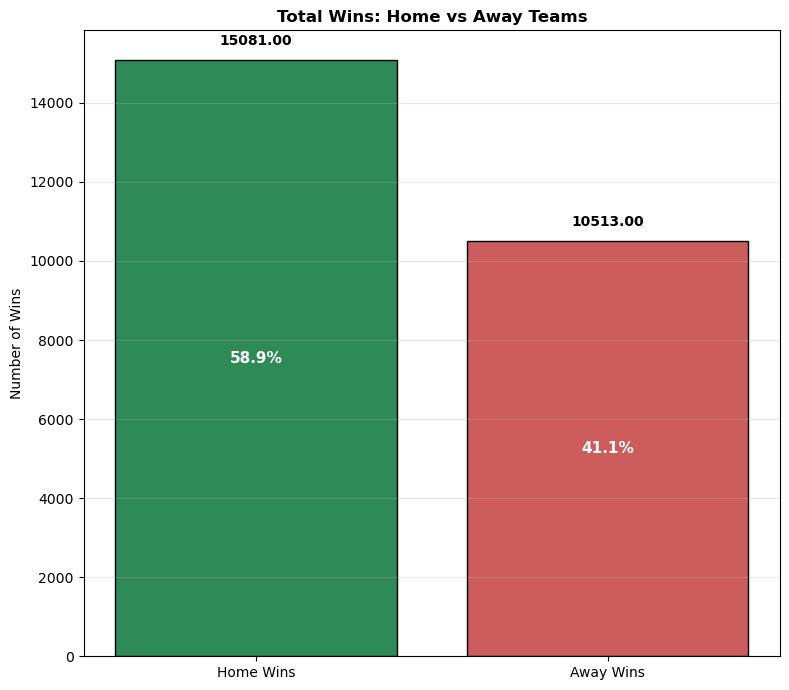

In [564]:
## For wins comparison
home_wins = df_games['HOME_TEAM_WINS'].sum()
away_wins = (df_games['HOME_TEAM_WINS'] == 0).sum()

create_bar_chart(
    data=[home_wins, away_wins],
    labels=['Home Wins', 'Away Wins'],
    title='Total Wins: Home vs Away Teams',
    ylabel='Number of Wins',
    percentage_annotations=True,
    total_games=len(df_games)
)

### **One-Sample Z-Test**

After observing that home teams win more often than away teams (58.92% vs 41.08%), we perform a **one-sample z-test** to determine if the home win rate is significantly higher than 50%, which would indicate a home-court advantage. By comparing the observed win percentage against the expected 50% baseline, the test accounts for the binary nature of win/loss outcomes across all games.

### `Conclusion:` *The difference in win percentage is **statistically significant**, indicating that home teams consistently win more games than away teams.*


In [607]:
## Length of games
n_games = len(df_games)

## Calculate percentages
home_win_pct = home_wins / n_games
away_win_pct = away_wins / n_games
mean_diff = home_win_pct - away_win_pct

## Standard deviation and standard error
## For binary win/loss data
std_diff = np.sqrt((home_win_pct * away_win_pct) + (away_win_pct * home_win_pct))
se_diff = std_diff / np.sqrt(n_games)

## Confidence interval
ci_lower = mean_diff - 1.96 * se_diff
ci_upper = mean_diff + 1.96 * se_diff

## Z-test
## This calculates z-statistic for testing if home_win_pct > 0.5
z_stat = (home_win_pct - 0.5) / np.sqrt((0.5 * 0.5) / n_games)

## p-value from z-statistic
from scipy.stats import norm
p_value = 1 - norm.cdf(z_stat)  ## One-tailed p-value

print(f"Number of games: {n_games}")
print(f"Home win percentage: {home_win_pct:.2%}")
print(f"Away win percentage: {away_win_pct:.2%}")
print(f"Mean home advantage: {mean_diff:.4f} win percentage difference")
print(f"95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"z-statistic: {z_stat:.2f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("CONCLUSION: Home teams win significantly more than away teams (p < 0.05)")
else:
    print("CONCLUSION: No significant home advantage in win percentage (p ≥ 0.05)")

Number of games: 25594
Home win percentage: 58.92%
Away win percentage: 41.08%
Mean home advantage: 0.1785 win percentage difference
95% CI: [0.1700, 0.1870]
z-statistic: 28.55
p-value: 0.0000
CONCLUSION: Home teams win significantly more than away teams (p < 0.05)


### **3.1.2. Scoring Difference**

A common observation in the NBA is that teams often perform better offensively when playing at home. This could be due to familiar surroundings, crowd support, or reduced travel fatigue. In this section, we examine whether home teams score significantly more points than away teams.

### `Question:` *Do home teams score significantly more than away teams?*

The distribution of point differences between home and away teams shows that **home teams generally score more points** than their opponents. Most games have positive differences (home points minus away points), indicating a home-court scoring advantage. 

The mean difference of **2.83 points** suggests that, on average, home teams score slightly but consistently more than away teams. The spread of the distribution also shows that while some games heavily favor the home team, others are closer or even favor the awa

<module 'matplotlib.pyplot' from 'c:\\Users\\joshu\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

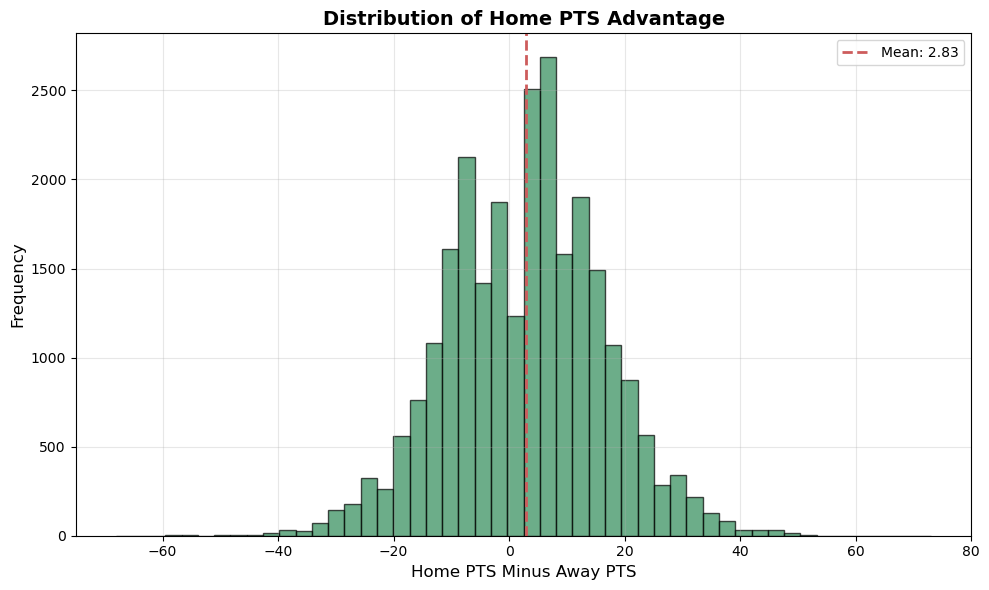

In [566]:
## Difference in points
plot_distribution_of_differences(df_games, 'PTS_home', 'PTS_away')

This plot shows the **seasonal trend of home-court scoring advantage** across all NBA seasons in the dataset (2004–2022). Each point represents the average difference in points scored by home teams versus away teams for that season.

From the visualization, we can see that **home teams consistently score more than away teams** each season, with the overall mean advantage around **2.83 points**. The trend is visually unstable over the years, a specific standout being 2022. This maybe due to numerous reasons, the most prevalent one being that arenas were still recovering from the pandemic and were forced to enfore an around 50% maximum capacity.


<module 'matplotlib.pyplot' from 'c:\\Users\\joshu\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

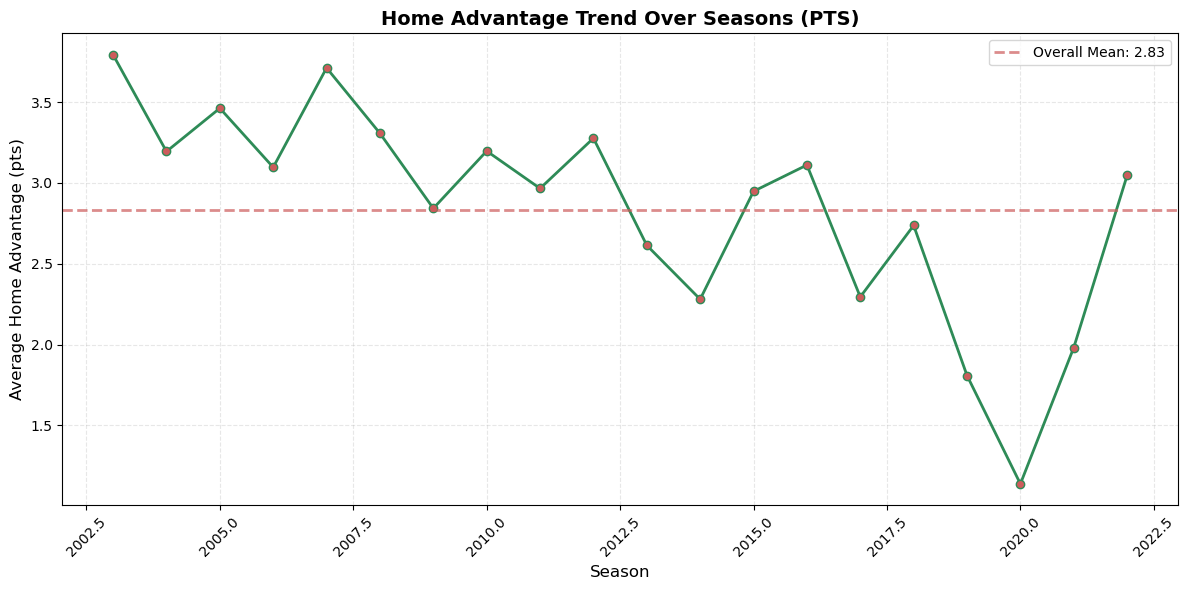

In [608]:
plot_seasonal_trend(df_games, 'PTS')

This horizontal bar chart compares the **average points scored per game** by each NBA team when playing at home versus away. Each team is represented on the y-axis, with green bars showing home points and red bars showing away points.

From the visualization, we can observe that:

- **Most teams score more points at home than away**, highlighting the presence of a home-court advantage in scoring.
- The magnitude of the difference varies by team:
  - Some teams, like NOP, show a **6–7 point difference**.
  - Others, like BKN, have a smaller gap, indicating ~~ they are bad~~ more consistent scoring regardless of venue 

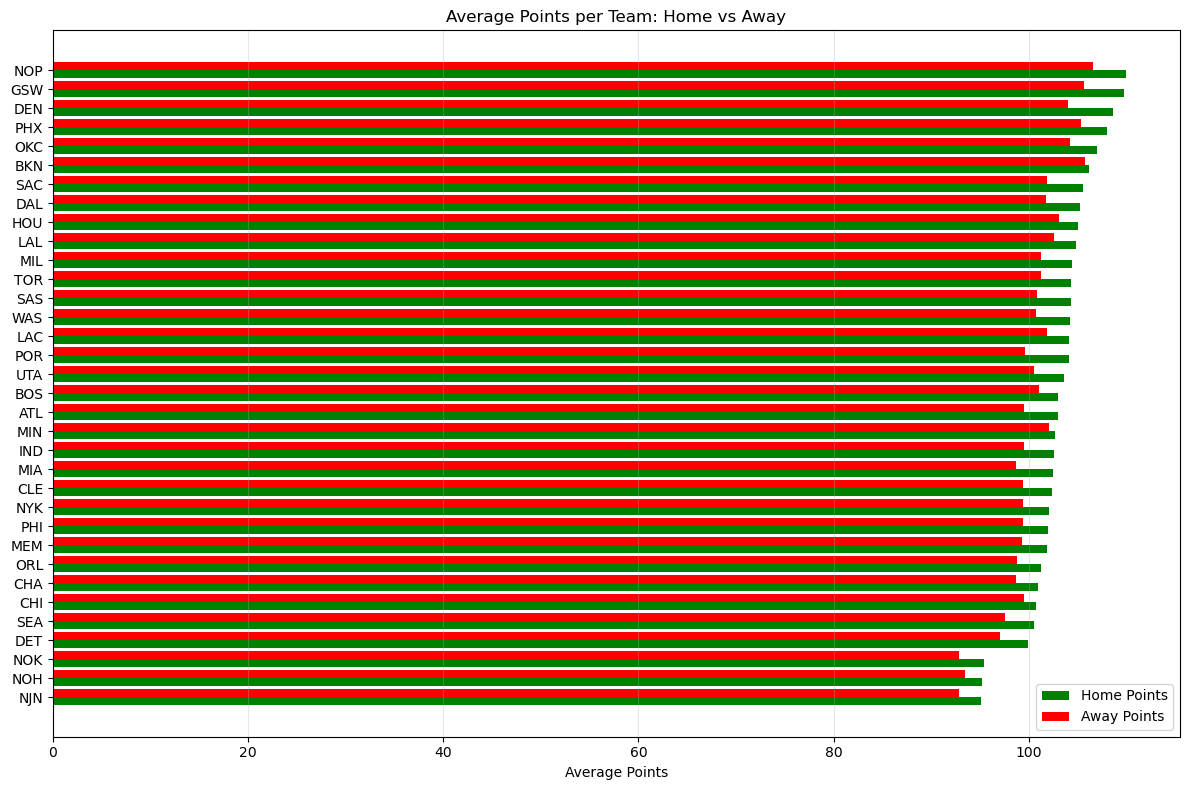

In [568]:
## Aggregate average points per team using abbreviations 
home_pts = df_games.groupby('TEAM_ABBREVIATION_home')['PTS_home'].mean().reset_index() 
away_pts = df_games.groupby('TEAM_ABBREVIATION_away')['PTS_away'].mean().reset_index() 

## Merge home and away averages by team abbreviation 
team_pts = home_pts.merge(away_pts, left_on='TEAM_ABBREVIATION_home', right_on='TEAM_ABBREVIATION_away') 
team_pts = team_pts.rename(columns={ 'TEAM_ABBREVIATION_home':'Team', 'PTS_home':'Avg_PTS_Home', 'PTS_away':'Avg_PTS_Away' })

## Sort by home points
team_pts = team_pts.sort_values('Avg_PTS_Home', ascending=True)

## Number of teams
n_teams = len(team_pts)
y = np.arange(n_teams)
width = 0.4

plt.figure(figsize=(12,8))
plt.barh(y - width/2, team_pts['Avg_PTS_Home'], height=width, label='Home Points', color='green')
plt.barh(y + width/2, team_pts['Avg_PTS_Away'], height=width, label='Away Points', color='red')
plt.yticks(y, team_pts['Team'])
plt.xlabel('Average Points')
plt.title('Average Points per Team: Home vs Away')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### **Paired T-Test for Points Scored**

After observing that home teams tend to score more points than away teams (average difference of 2.83 points per game), we perform a **paired t-test** to determine if this difference is statistically significant. By comparing points scored by each team in the same game as home versus away, the test accounts for the natural pairing of games in the dataset.

### `Conclusion:` *The difference in points per game is **statistically significant**, indicating that home teams consistently score more points than away teams.*

In [569]:
results_pts = perform_home_away_test(df_games, 'PTS')

Number of games: 25594
Mean home advantage: 2.83 points
Standard deviation of difference: 13.52
95% CI: [2.67, 3.00]
t-statistic: 33.51
p-value: 0.0000


CONCLUSION: Home teams have significantly higher pts than away teams (p < 0.05)




### **3.1.3. Assist Difference**

We then examine **average assists per game** to see if home-court advantage also affects team playmaking. By calculating the mean assists for home and away teams, we can compare how team collaboration changes based on game location.  

### `Question:` *Do home teams generate significantly more assists than away teams?*

To explore whether home teams tend to facilitate more scoring opportunities, we examine the **difference in assists** between home and away teams. By plotting the distribution of home-minus-away assists for each game, we can visualize the typical home advantage in playmaking.

The histogram shows how often home teams record more assists than away teams, as well as the spread of differences across all games.

<module 'matplotlib.pyplot' from 'c:\\Users\\joshu\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

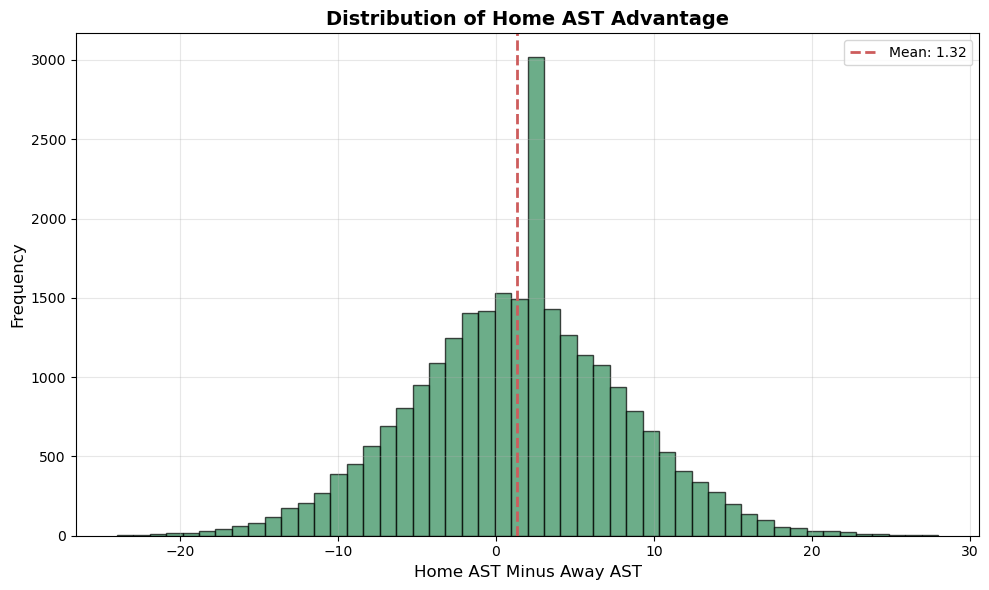

In [570]:
## Difference in assists
plot_distribution_of_differences(df_games, 'AST_home', 'AST_away')

### **Paired T-Test for Assists**

After observing that home teams tend to record more assists than away teams (average difference of 1.32 assists per game), we perform a **paired t-test** to determine if this difference is statistically significant. By comparing assists for each team in the same game as home versus away, the test accounts for the natural pairing of games in the dataset.

### `Conclusion:` *The difference in assists per game is **statistically significant**, indicating that home teams consistently register more assists than away teams.*

In [572]:
results_pts = perform_home_away_test(df_games, 'AST')

Number of games: 25594
Mean home advantage: 1.32 assists
Standard deviation of difference: 6.78
95% CI: [1.24, 1.41]
t-statistic: 31.26
p-value: 0.0000


CONCLUSION: Home teams have significantly higher ast than away teams (p < 0.05)




### **3.1.4. Rebound Difference**

We then examine **average rebounds per game** to explore whether home-court advantage affects teams’ ability to secure possessions. 

### `Question:` *Do home teams have significantly more rebounds than away teams?*

The histogram highlights how frequently home teams grab more rebounds than away teams, along with the overall spread of differences across all games.As we can see, there is a wider spread in the data, indicating that while home teams often secure more rebounds, the magnitude of the advantage varies considerably from game to game.

<module 'matplotlib.pyplot' from 'c:\\Users\\joshu\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

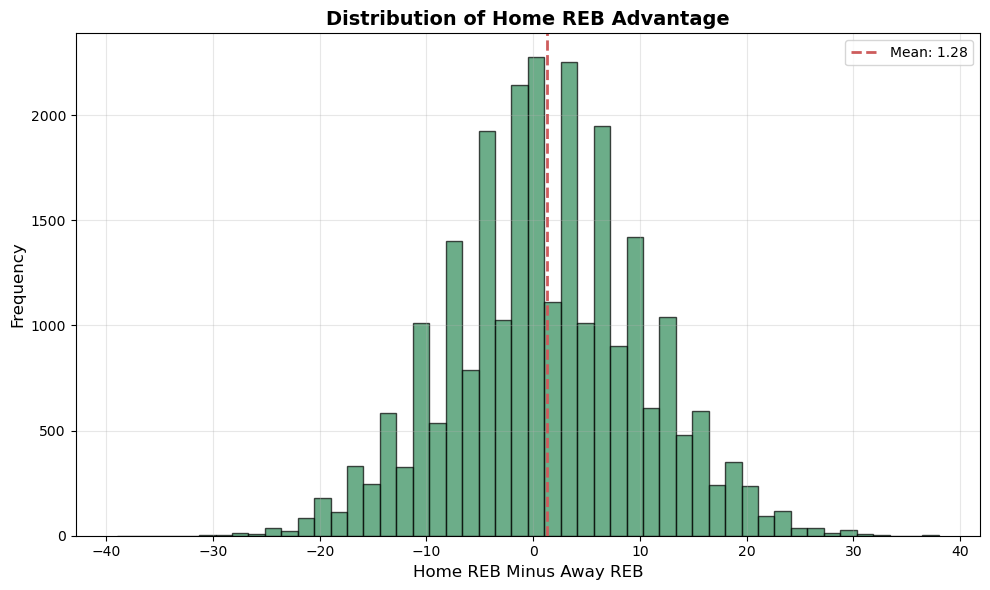

In [609]:
## Difference in rebounds
plot_distribution_of_differences(df_games, 'REB_home', 'REB_away')

### **Paired T-Test for Rebounds**

After observing that home teams tend to grab slightly more rebounds than away teams (average difference of 1.28 rebounds per game), we perform a **paired t-test** to determine if this difference is statistically significant. By comparing rebounds for each team in the same game as home versus away, the test accounts for the natural pairing of games in the dataset.

### `Conclusion:` *The difference in rebounds per game is **statistically significant**, indicating that home teams consistently secure more rebounds than away teams.*


In [575]:
results_pts = perform_home_away_test(df_games, 'REB')

Number of games: 25594
Mean home advantage: 1.28 rebounds
Standard deviation of difference: 8.99
95% CI: [1.17, 1.39]
t-statistic: 22.74
p-value: 0.0000


CONCLUSION: Home teams have significantly higher reb than away teams (p < 0.05)




### **3.1.5. Free Throw Attempts Difference**

A crucial part of the game often discussed among NBA fans is **referee bias**. Many believe that home teams receive more favorable calls, leading to increased free throw attempts (FTA). This perception suggests that officials may be subconsciously influenced by the home crowd, especially during close or high-pressure moments.

In this section, we examine whether this belief holds true by analyzing the differences in **average free throw attempts** between home and away teams. By comparing their FTA averages, we can determine if home teams truly get an officiating advantage at the line.

### `Question:` *Do home teams attempt significantly more free throws than away teams?*

To investigate whether home teams benefit from officiating tendencies, we examine the **difference in free throw attempts (FTA)** between home and away teams. By plotting the distribution of home-minus-away FTA for each game, we can visualize the typical home advantage at the free throw line.

The histogram illustrates how often home teams attempt more free throws than away teams, as well as the variability of this difference across all games. Similar to the difference in rebounds, the distribution of FTA is also widely spread which indicates an inconsistency in the referees' calling.

<module 'matplotlib.pyplot' from 'c:\\Users\\joshu\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

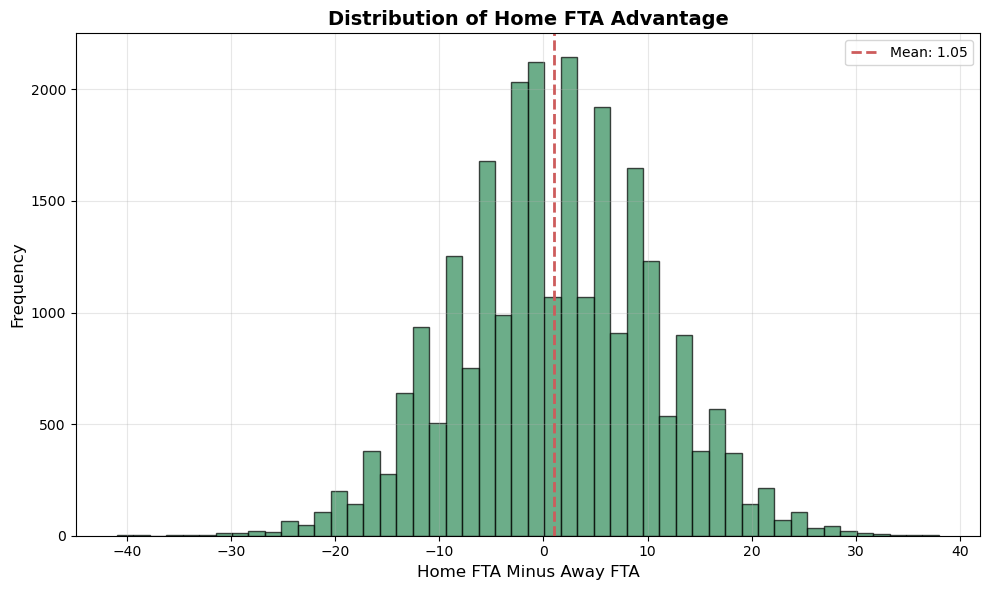

In [576]:
## Difference in fta
plot_distribution_of_differences(df_games, 'FTA_home', 'FTA_away')

### **Paired T-Test for Free Throw Attempts**

To further investigate whether home teams benefit from officiating tendencies, we conducted a paired t-test comparing **Free Throw Attempts (FTA)** between home and away teams.

After observing that home teams tend to get slightly more free throw attempts than away teams (average difference of 1.05 attempts per game), we perform a **paired t-test** to determine if this difference is statistically significant. By comparing free throw attempts for each team in the same game as home versus away, the test accounts for the natural pairing of games in the dataset.

### `Conclusion:` *The difference in free throw attempts per game is **statistically significant**, indicating that home teams consistently get more free throw attempts than away teams.*


In [578]:
results_pts = perform_home_away_test(df_games, 'FTA')

Number of games: 25594
Mean home advantage: 1.05 units
Standard deviation of difference: 9.45
95% CI: [0.93, 1.16]
t-statistic: 17.70
p-value: 0.0000


CONCLUSION: Home teams have significantly higher fta than away teams (p < 0.05)




### **3.1.6. Field Goal Percentage Difference**

Shooting efficiency is one of the most important indicators of a team’s offensive performance, and **Field Goal Percentage (FG%)** measures how effectively teams convert their shot attempts. Because factors such as crowd support, court familiarity, and shooting rhythm can influence performance, it’s often suggested that home teams may shoot more efficiently than their away counterparts.

In this section, we compare the **average FG%** of home and away teams to determine whether location impacts shooting efficiency.

### `Question:` *Do home teams shoot significantly more efficiently than away teams?*

To examine whether home teams shoot more efficiently from the field, we analyze the **difference in field goal percentage (FG%)** between home and away teams. By plotting the distribution of home-minus-away FG% for each game, we can visualize the typical home advantage in shooting accuracy.

The histogram illustrates how often home teams achieve a higher FG% than away teams and highlights the spread of differences across all games. We can see consistency of the spread and how it isn't as 'spiky' as the other statistics.

<module 'matplotlib.pyplot' from 'c:\\Users\\joshu\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

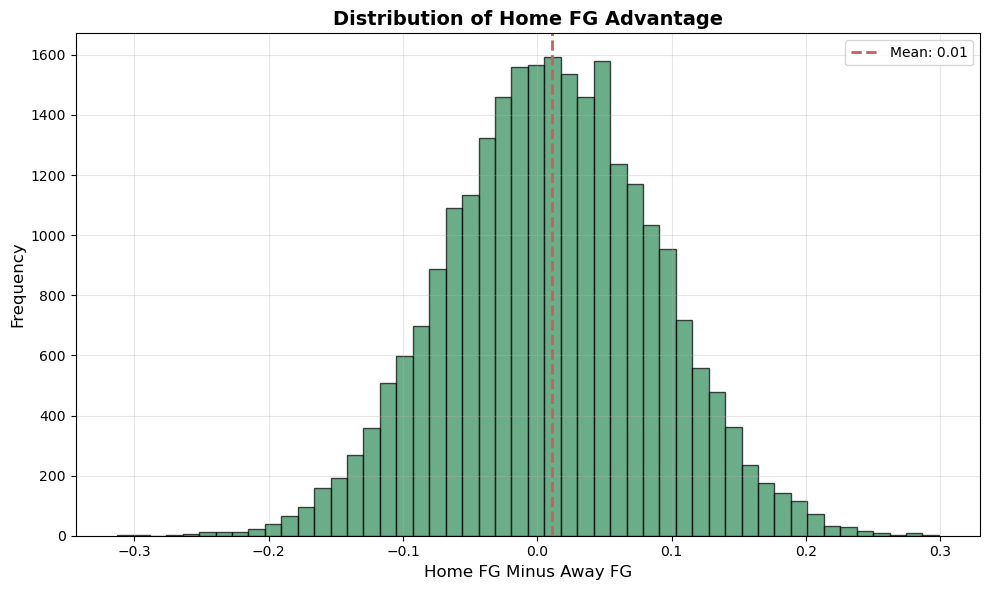

In [ ]:
## Difference in fg%
plot_distribution_of_differences(df_games, 'FG_PCT_home', 'FG_PCT_away')

### **Paired T-Test for Field Goal Percentage**

To determine whether the observed difference in shooting efficiency between home and away teams is meaningful, we performed a paired t-test on **Field Goal Percentage (FG%)**. This test evaluates whether home teams consistently shoot better than away teams across the same set of games.

After observing that home teams tend to have a slightly higher FG% than away teams (average difference of 0.01 percentage points per game), we perform a **paired t-test** to determine if this difference is statistically significant. By comparing FG% for each team in the same game as home versus away, the test accounts for the natural pairing of games in the dataset.

### `Conclusion:` *The difference in field goal percentage is **statistically significant**, indicating that home teams consistently have slightly higher FG% than away teams.*


In [581]:
results_pts = perform_home_away_test(df_games, 'FG_PCT')

Number of games: 25594
Mean home advantage: 0.01 percentage points
Standard deviation of difference: 0.08
95% CI: [0.01, 0.01]
t-statistic: 22.59
p-value: 0.0000


CONCLUSION: Home teams have significantly higher fg_pct than away teams (p < 0.05)




### **3.1.7. Free Throw Percentage Difference**

Free throw shooting is often considered one of the most consistent and least environment-dependent aspects of basketball. Unlike field goals, free throws involve no defenders and occur in a controlled setting. However, crowd pressure, fatigue, and psychological factors may still influence a player's performance at the line.

To explore whether playing at home impacts free throw efficiency, we compared the **average Free Throw Percentage (FT%)** of home and away teams.

### `Question:` *Do home teams shoot significantly more efficiently at the free throw line than away teams?*

The histogram below shows the distribution of **home-minus-away Free Throw Percentage (FT%)** for each game. The x-axis represents the difference in FT% between the home team and the away team, while the y-axis shows the frequency of games for each difference value. 

From the plot, we can see that most differences are clustered closely around **0.00**, indicating that home teams rarely have a meaningful advantage in free throw accuracy. The red dashed line marks the **mean difference**, which is essentially zero, further confirming that the home court does not provide a significant boost in FT%.

This visualization highlights the symmetry of FT% performance between home and away teams and the lack of a consistent home advantage in free throw shooting.

<module 'matplotlib.pyplot' from 'c:\\Users\\joshu\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

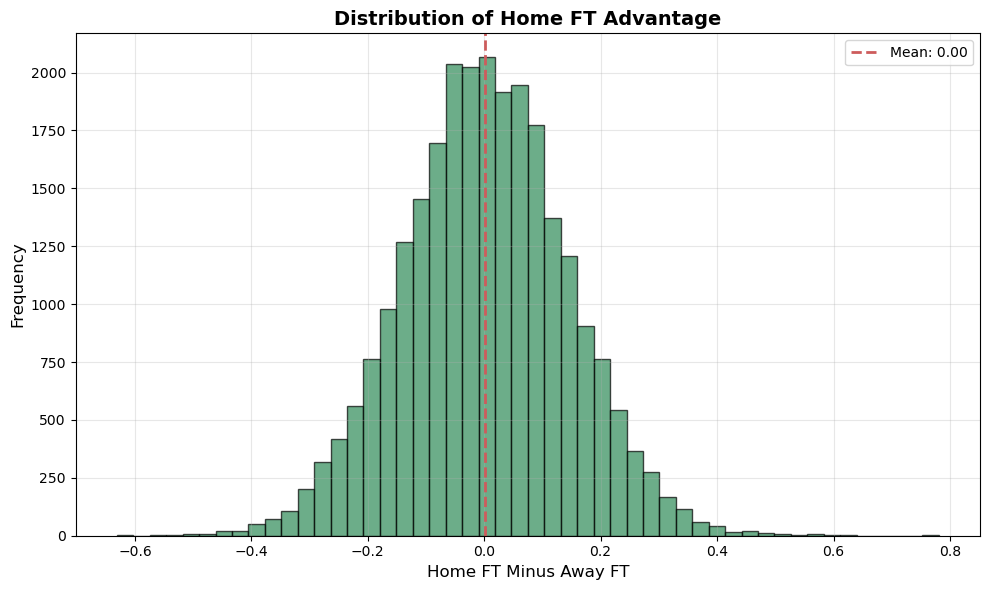

In [ ]:
## Difference in ft%
plot_distribution_of_differences(df_games, 'FT_PCT_home', 'FT_PCT_away')

### **Paired T-Test for Free Throw Percentage**

To evaluate whether home teams have an advantage in free throw accuracy, we examine the **difference in Free Throw Percentage (FT%)** between home and away teams. By plotting the distribution of home-minus-away FT% for each game, we can visualize how often home teams shoot more accurately from the line.

After observing that home teams have a negligible difference in FT% compared to away teams (average difference of 0.00 percentage points), we perform a **paired t-test** to determine if this difference is statistically significant. By comparing FT% for each team in the same game as home versus away, the test accounts for the natural pairing of games in the dataset.

### `Conclusion:` *The difference in free throw percentage is **not statistically significant**, indicating that home court does not meaningfully affect FT% for teams.*



In [ ]:
results_ft_pct = perform_home_away_test(df_games, 'FT_PCT')

Number of games: 25594
Mean home advantage: 0.00 percentage points
Standard deviation of difference: 0.14
95% CI: [-0.00, 0.00]
t-statistic: 1.83
p-value: 0.0679


CONCLUSION: No significant home advantage in ft_pct (p ≥ 0.05)




### **3.1.8. Three Point Percentage Difference**

Three-point shooting is a key component of modern basketball offense, and efficiency from beyond the arc can significantly impact game outcomes. While long-range shooting is often considered more challenging and subject to variability, factors like crowd noise and court familiarity may still influence performance.

In this section, we compare the **average Three-Point Percentage (3P%)** of home and away teams to assess potential home-court effects.

### `Question:` *Do home teams shoot three-pointers significantly more efficiently than away teams?*

The histogram below shows the distribution of home-minus-away three-point field goal percentage (FG3%) for all NBA games in the dataset. The x-axis represents the difference in FG3% between the home and away team for each game, while the y-axis represents the frequency of games with that difference.

The red dashed line indicates the mean difference of 0.01 percentage points, showing that, on average, home teams shoot slightly better from three-point range than away teams. The distribution is roughly symmetric and centered close to zero, suggesting that while most games have minimal differences, home teams tend to have a small, consistent advantage in three-point shooting.

<module 'matplotlib.pyplot' from 'c:\\Users\\joshu\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

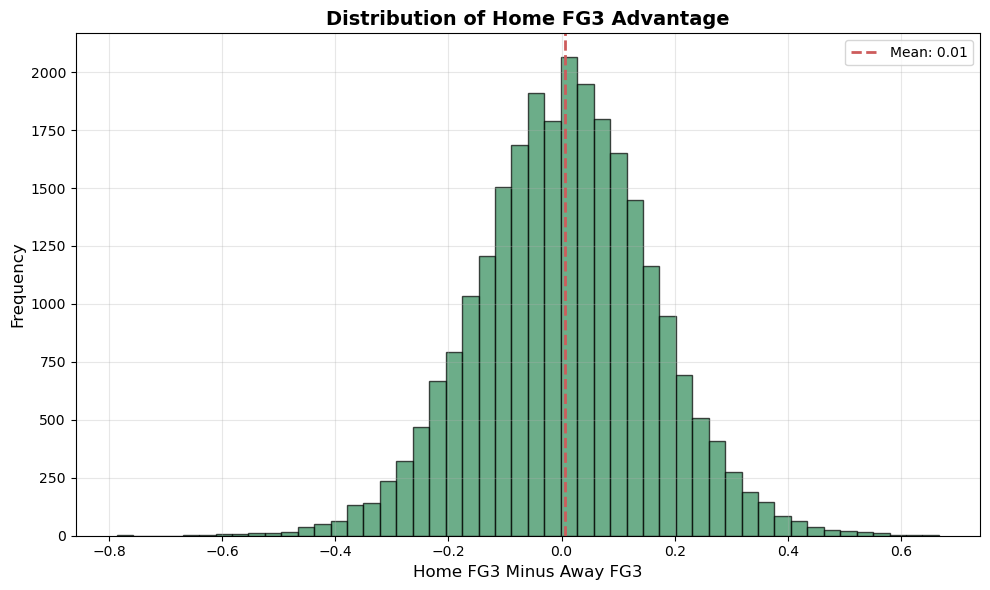

In [585]:
## Difference in assists
plot_distribution_of_differences(df_games, 'FG3_PCT_home', 'FG3_PCT_away')

### **Paired T-Test for Three-Point Field Goal Percentage**

To evaluate whether home teams have an advantage in three-point shooting, we examine the **difference in Three-Point Field Goal Percentage (FG3%)** between home and away teams. By plotting the distribution of home-minus-away FG3% for each game, we can visualize how often home teams shoot more efficiently from beyond the arc.

After observing that home teams have a small positive difference in FG3% compared to away teams (average difference of 0.01 percentage points), we perform a **paired t-test** to determine if this difference is statistically significant. By comparing FG3% for each team in the same game as home versus away, the test accounts for the natural pairing of games in the dataset.

### `Conclusion:` *The difference in three point percentage is **statistically significant**, indicating that home teams consistently have slightly higher 3FG% than away teams.*


In [587]:
results_pts = perform_home_away_test(df_games, 'FG3_PCT')

Number of games: 25594
Mean home advantage: 0.01 percentage points
Standard deviation of difference: 0.16
95% CI: [0.00, 0.01]
t-statistic: 6.69
p-value: 0.0000


CONCLUSION: Home teams have significantly higher fg3_pct than away teams (p < 0.05)




### **3.2. Home vs Away: Player Performance**

For our second analysis, we'll examine whether individual players perform differently when playing at home versus away. We'll focus on key metrics including:
- Scoring: Points per game
- Playmaking: Assists per game
- Rebounding: Rebounds per game
- Efficiency: Field goal percentage, three-point percentage, free throw percentage
- Impact: Plus/minus
- Free throw attempts: FTA per game

We'll identify players who show the largest home/away differences and determine if these patterns are statistically significant across the player population.

In [588]:
## Function that calculates the a specified stat difference of a player when in home vs away.
## This is calculated by subtracting the HOME stat from the AWAY stat or
## AWAY_STAT - HOME_STAT
## This would mean that:
## - A negative value means the player has a higher HOME stat
## - A positive value means the player has a higher AWAY stat
def calculate_stat_differentials(player_df, stat_column, min_games=50, min_stat_value=None):

    ## Calculate home vs away averages for each player
    player_avgs = player_df.groupby(['PLAYER_NAME', 'IS_HOME']).agg({
        stat_column: 'mean',
        'GAME_ID': 'count'  ## Number of games played
    }).unstack()
    
    ## Calculate overall average for each player (for min_stat_value filtering)
    player_overall_avg = player_df.groupby('PLAYER_NAME')[stat_column].mean()
    
    ## Filter players with sufficient games
    game_counts = player_df.groupby('PLAYER_NAME').size()
    qualified_by_games = game_counts[game_counts >= min_games].index
    
    ## Additional filtering by minimum stat value if specified
    if min_stat_value is not None:
        qualified_by_stat = player_overall_avg[player_overall_avg >= min_stat_value].index
        qualified_players = qualified_by_games.intersection(qualified_by_stat)
    else:
        qualified_players = qualified_by_games
    
    ## Calculate stat differentials
    stat_diffs = []
    
    for player in qualified_players:
        home_stat = player_avgs.loc[player, (stat_column, True)]
        away_stat = player_avgs.loc[player, (stat_column, False)]
        stat_diff = away_stat - home_stat
            
        stat_diffs.append({
            'player': player,
            f'{stat_column.lower()}_diff': stat_diff,
            f'home_{stat_column.lower()}': home_stat,
            f'away_{stat_column.lower()}': away_stat,
            f'overall_{stat_column.lower()}': player_overall_avg[player],
            'total_games': game_counts[player]
        })
            
    
    return pd.DataFrame(stat_diffs)

### **3.2.1. Plus / Minus Difference**

### `Question:` *Which players show the largest home/away differences in plus/minus?*

Plus/minus is a comprehensive metric that measures a player's overall impact on the game—how much their team outscored or was outscored by the opponent while they were on the court. It captures both offensive and defensive contributions.

In this section, we identify players whose plus/minus differs most between home and away games. A negative differential (better at home) suggests a player thrives in familiar environments, while a positive differential (better on the road) might indicate resilience or different playing styles away from home.

We'll examine both regular players and "legends" (those with 1000+ games) to see if experience affects home/away performance patterns.

In [589]:
## Get plus/minus differentials
pm_diffs = calculate_stat_differentials(df_player_details, 'PLUS_MINUS', min_games=100)

## Top 10 players with better plus/minus on the road (positive differential)
pm_top_10_away = pm_diffs[pm_diffs['plus_minus_diff'] > 0].sort_values('plus_minus_diff', ascending=False).head(10)

## Top 10 players with better plus/minus at home (negative differential)
pm_top_10_home = pm_diffs[pm_diffs['plus_minus_diff'] < 0].sort_values('plus_minus_diff').head(10)

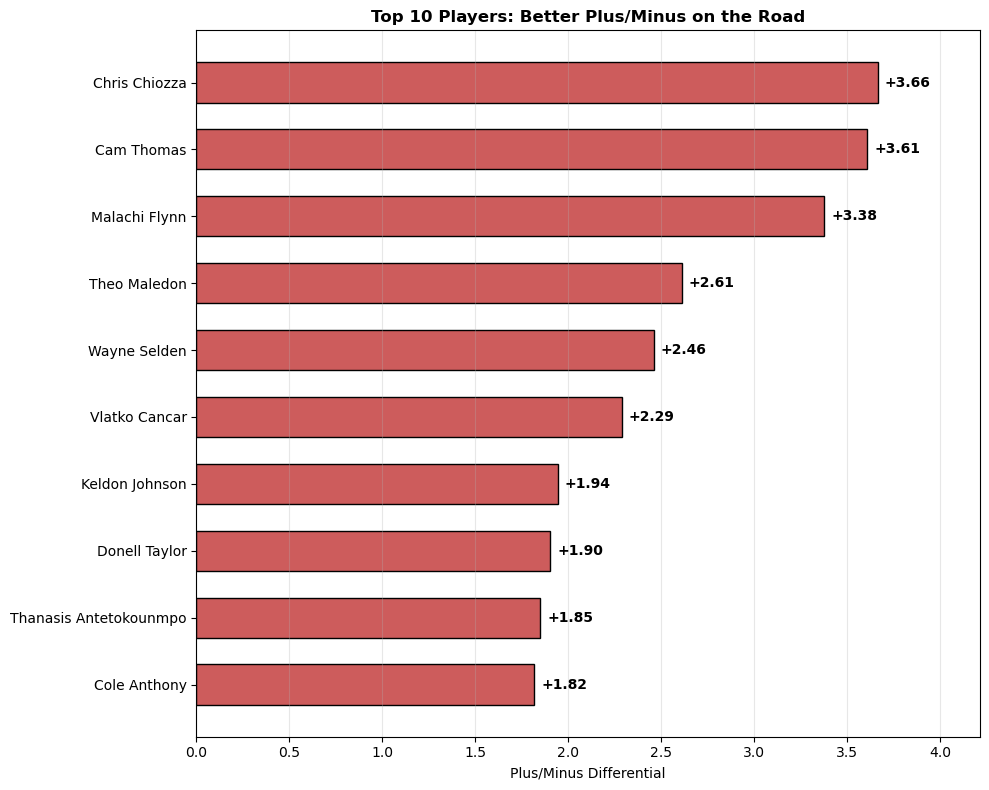

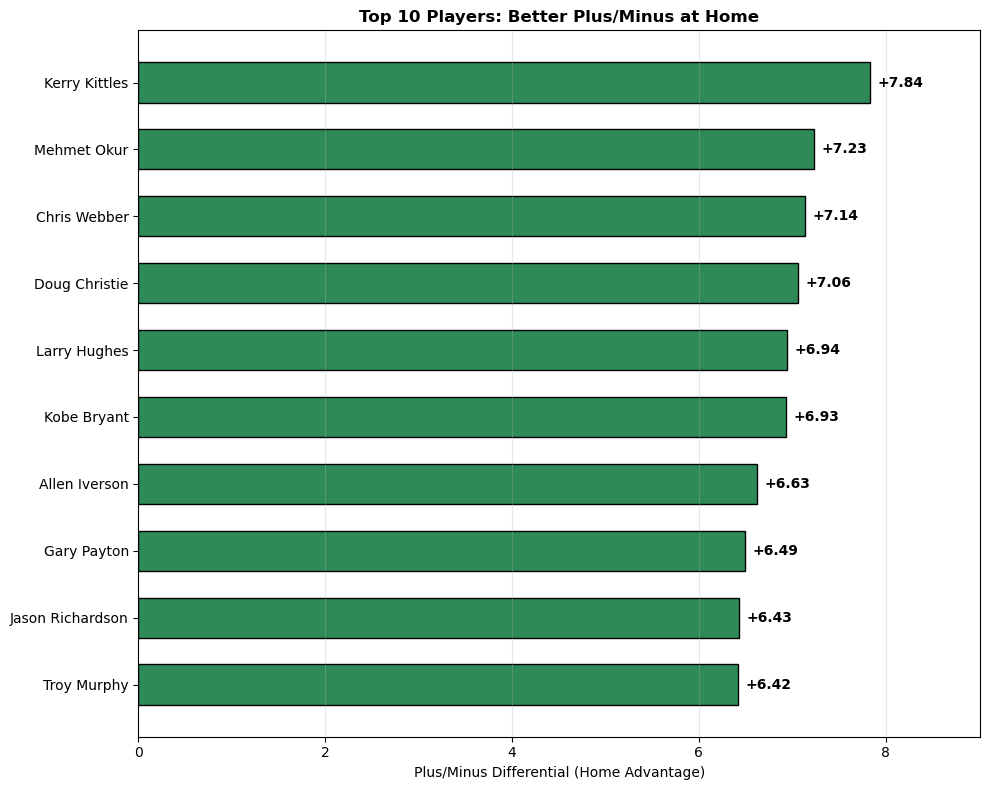

In [590]:
## Chart for top 10 away performers
create_bar_chart_horizontal(
    data = pm_top_10_away['plus_minus_diff'].values[::-1],
    labels = pm_top_10_away['player'].values[::-1],
    title = 'Top 10 Players: Better Plus/Minus on the Road',
    xlabel = 'Plus/Minus Differential',
    colors = [red] * 10,
    value_format = '+{:.2f}'
)

## Chart for top 10 home performers
create_bar_chart_horizontal(
    data = abs(pm_top_10_home['plus_minus_diff'].values[::-1]), ## absolute value to show positive
    labels = pm_top_10_home['player'].values[::-1],
    title = 'Top 10 Players: Better Plus/Minus at Home',
    xlabel = 'Plus/Minus Differential (Home Advantage)',
    colors = [green] * 10,
    value_format = '+{:.2f}'
)

In [591]:
## Get plus/minus differentials for 'legends'
## We define 'legends' as players who have played more than 1000 games
pm_diffs = calculate_stat_differentials(df_player_details, 'PLUS_MINUS', min_games=1000)

## Top 10 players with better plus/minus on the road (positive differential)
## Apparently, there are no 'legends' who have better plus/minus when playing on the road
pm_legends_top_10_away = pm_diffs[pm_diffs['plus_minus_diff'] > 0].sort_values('plus_minus_diff', ascending=False).head(10)

## Top 10 players with better plus/minus at home (negative differential)
pm_legends_top_10_home = pm_diffs[pm_diffs['plus_minus_diff'] < 0].sort_values('plus_minus_diff').head(10)

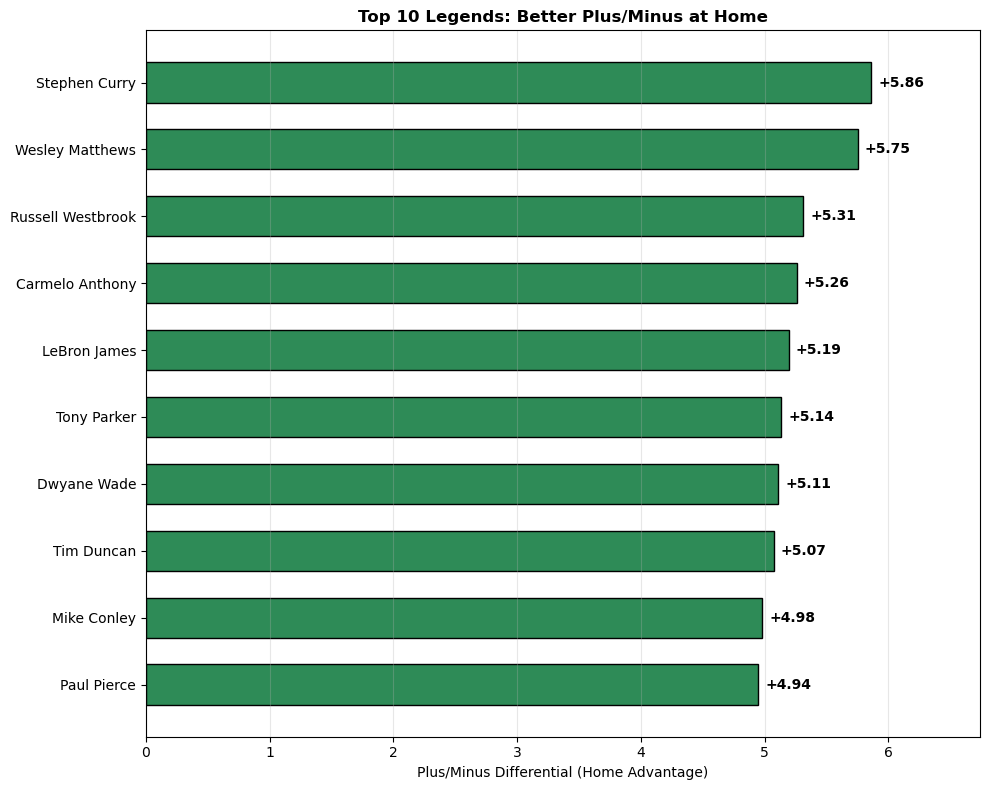

In [592]:
## Chart for legends top 10 home performers
create_bar_chart_horizontal(
    data=abs(pm_legends_top_10_home['plus_minus_diff'].values)[::-1],
    labels=pm_legends_top_10_home['player'].values[::-1],
    title='Top 10 Legends: Better Plus/Minus at Home',
    xlabel='Plus/Minus Differential (Home Advantage)',
    colors=[green] * 10,
    value_format='+{:.2f}'
)

### `Conclusion:` *While some role players show better plus/minus on the road, established "legends" consistently perform better at home. This suggests that experienced star players thrive in familiar environments with home crowd support, while lesser-known players might adapt better to road challenges.*

### **3.2.2. Scoring Difference**

### `Question:` *Which players show the largest home/away differences in scoring?*

Scoring is the most visible and impactful aspect of basketball performance. While team-level analysis shows home teams score more, individual players may show varying patterns. Some players might feed off home crowd energy to score more, while others might face tighter defensive schemes or different officiating on the road.

In this section, we identify players whose scoring differs most between home and away games. We'll examine both all qualified players and high-scoring players (those averaging >20 points) separately to see if elite scorers show different home/away patterns.

In [593]:
## Get scoring differentials
scoring_diffs = calculate_stat_differentials(df_player_details, 'PTS', min_games=100)

## Top 10 players with better scoring on the road (positive differential)
scoring_top_10_away = scoring_diffs[scoring_diffs['pts_diff'] > 0].sort_values('pts_diff', ascending=False).head(10)

## Top 10 players with better scoring at home (negative differential)
scoring_top_10_home = scoring_diffs[scoring_diffs['pts_diff'] < 0].sort_values('pts_diff').head(10)

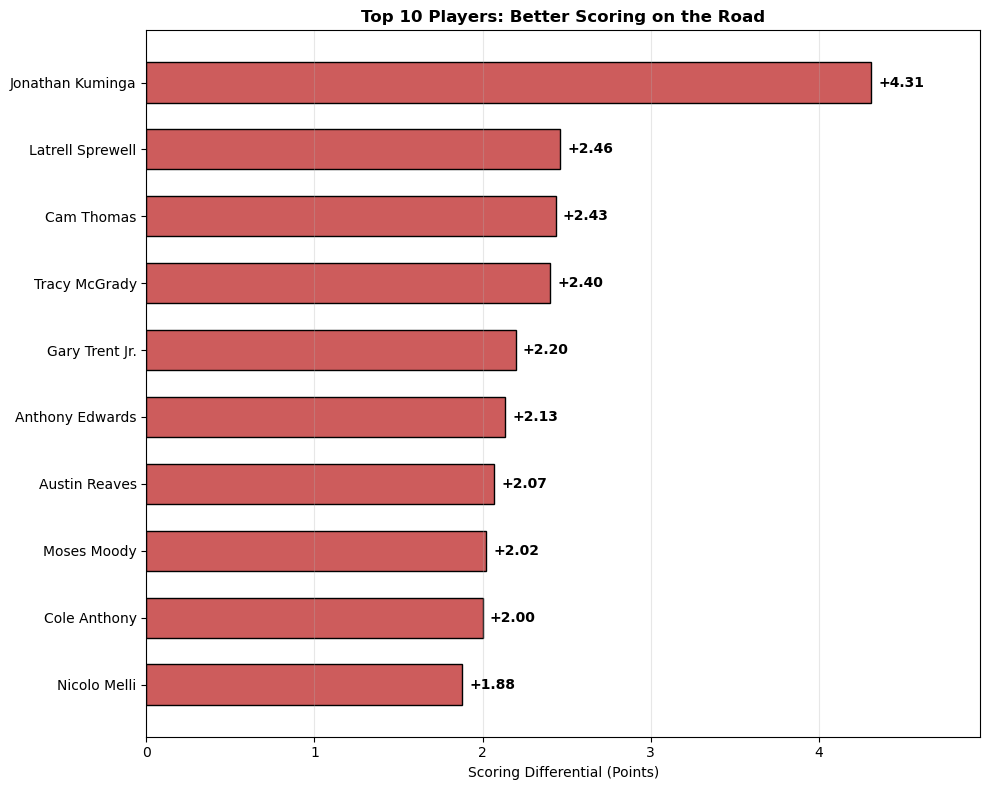

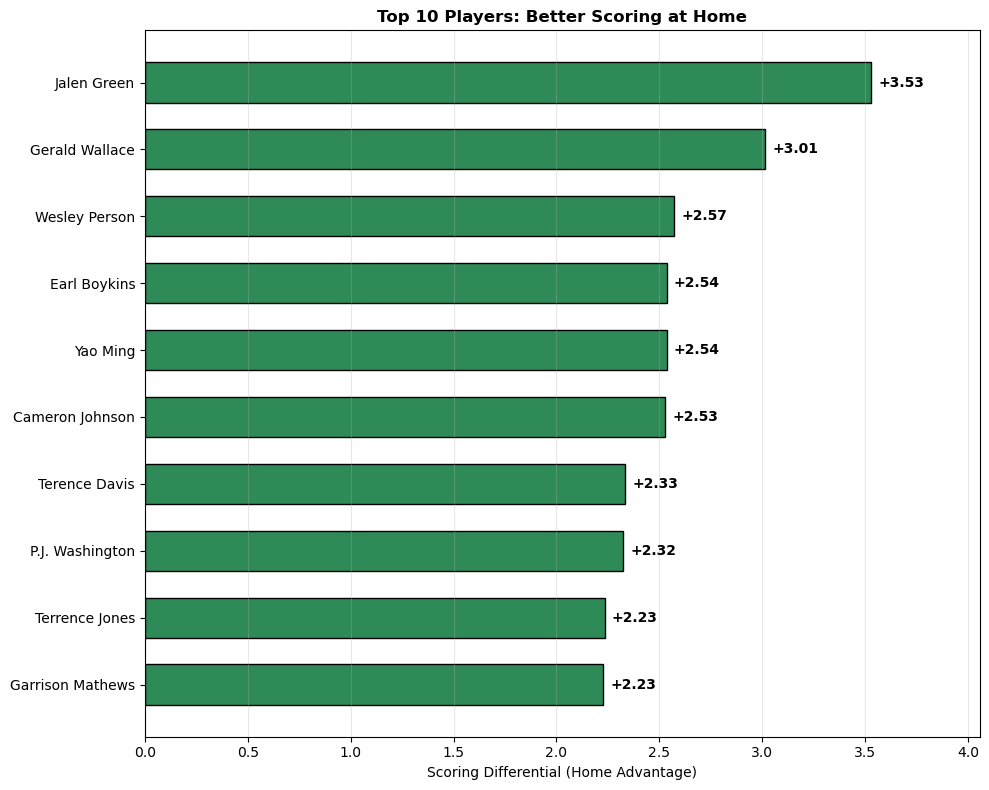

In [594]:
## Chart for top 10 away performers
create_bar_chart_horizontal(
    data=scoring_top_10_away['pts_diff'].values[::-1],
    labels=scoring_top_10_away['player'].values[::-1],
    title='Top 10 Players: Better Scoring on the Road',
    xlabel='Scoring Differential (Points)',
    colors=[red] * 10,
    value_format='+{:.2f}'
)

## Chart for top 10 home performers
create_bar_chart_horizontal(
    data=abs(scoring_top_10_home['pts_diff'].values[::-1]),
    labels=scoring_top_10_home['player'].values[::-1],
    title='Top 10 Players: Better Scoring at Home',
    xlabel='Scoring Differential (Home Advantage)',
    colors=[green] * 10,
    value_format='+{:.2f}'
)

In [595]:
## Get scoring differentials
## This time for high scoring individuals or players who average > 20 points
high_scoring_diffs = calculate_stat_differentials(df_player_details, 'PTS', min_games=100, min_stat_value=20)

## Top 10 players with better scoring on the road (positive differential)
high_scoring_top_10_away = high_scoring_diffs[high_scoring_diffs['pts_diff'] > 0].sort_values('pts_diff', ascending=False).head(10)

# Top 10 players with better scoring at home (negative differential)
high_scoring_top_10_home = high_scoring_diffs[high_scoring_diffs['pts_diff'] < 0].sort_values('pts_diff').head(10)

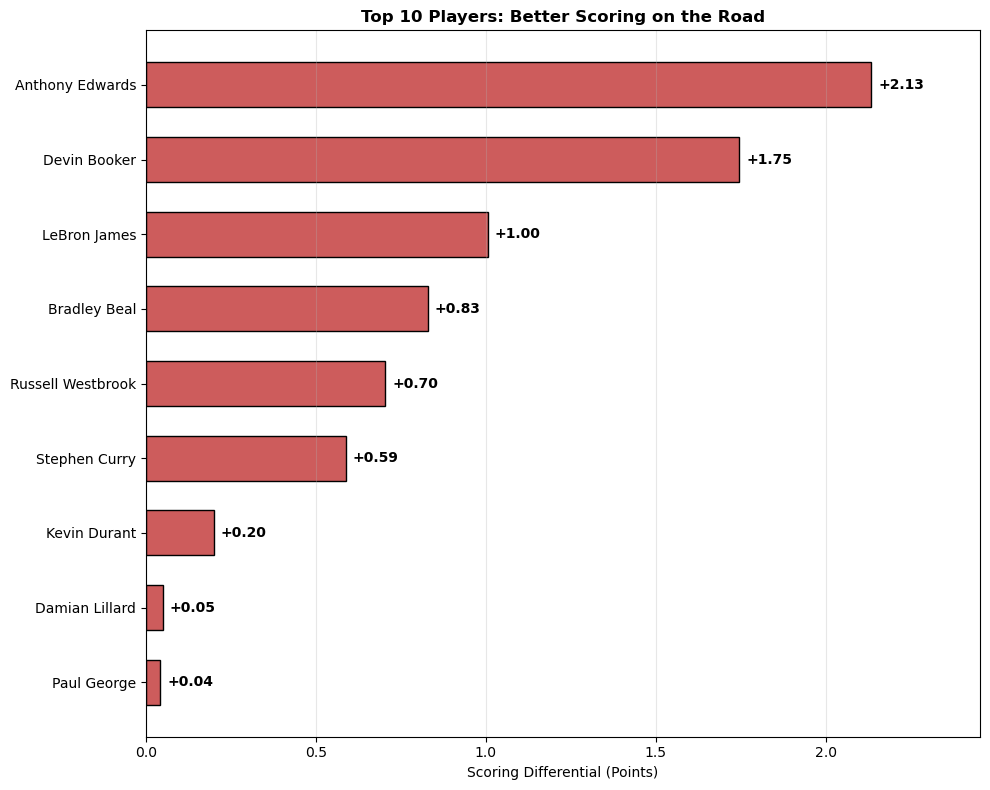

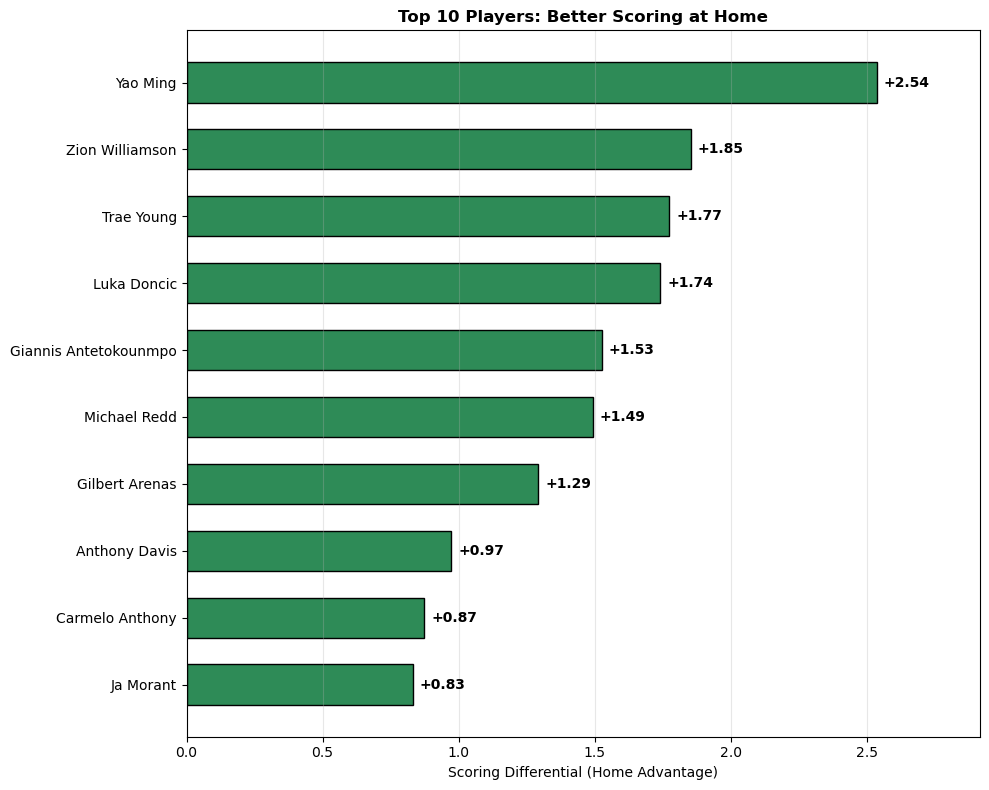

In [596]:
## Chart for top 10 away performers
create_bar_chart_horizontal(
    data=high_scoring_top_10_away['pts_diff'].values[::-1],
    labels=high_scoring_top_10_away['player'].values[::-1],
    title='Top 10 Players: Better Scoring on the Road',
    xlabel='Scoring Differential (Points)',
    colors=[red] * 10,
    value_format='+{:.2f}'
)

## Chart for top 10 home performers
create_bar_chart_horizontal(
    data=abs(high_scoring_top_10_home['pts_diff'].values[::-1]),
    labels=high_scoring_top_10_home['player'].values[::-1],
    title='Top 10 Players: Better Scoring at Home',
    xlabel='Scoring Differential (Home Advantage)',
    colors=[green] * 10,
    value_format='+{:.2f}'
)

### `Conclusion:` *Most high-volume scorers perform better at home, but some notable exceptions exist. Players who thrive on the road often have playing styles less dependent on crowd energy or may face different defensive attention away from home. The home scoring advantage is more pronounced among elite scorers averaging >20 points.*

### **3.2.3. Free Throw Attempts Difference**

### `Question:` *Which players show the largest home/away differences in free throw attempts?*

Free throw attempts (FTA) are not just about player skill—they're heavily influenced by officiating and playing style. The perception of referee bias toward home teams extends to individual players, with some potentially drawing more fouls at home due to favorable calls or aggressive play encouraged by the home crowd.

In this section, we identify players whose free throw attempt patterns differ most between home and away games. Understanding which players benefit most from home officiating (or suffer most on the road) can reveal how venue affects individual playing styles and referee interactions.

In [597]:
# Get FTA differentials
fta_diffs = calculate_stat_differentials(df_player_details, 'FTA', min_games=100)

# Top 10 players with higher free throw attempts on the road (positive differential)
fta_top_10_away = fta_diffs [fta_diffs ['fta_diff'] > 0].sort_values('fta_diff', ascending=False).head(10)

# Top 10 players with higher free throw attempts at home (negative differential)
fta_top_10_home = fta_diffs [fta_diffs ['fta_diff'] < 0].sort_values('fta_diff').head(10)

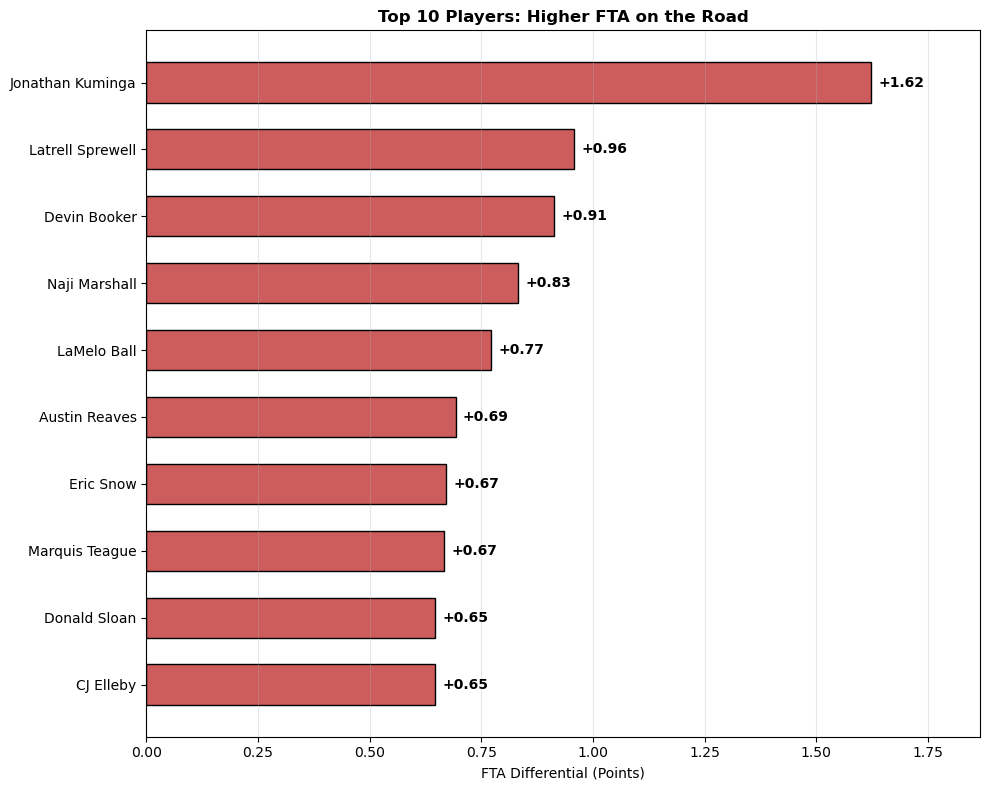

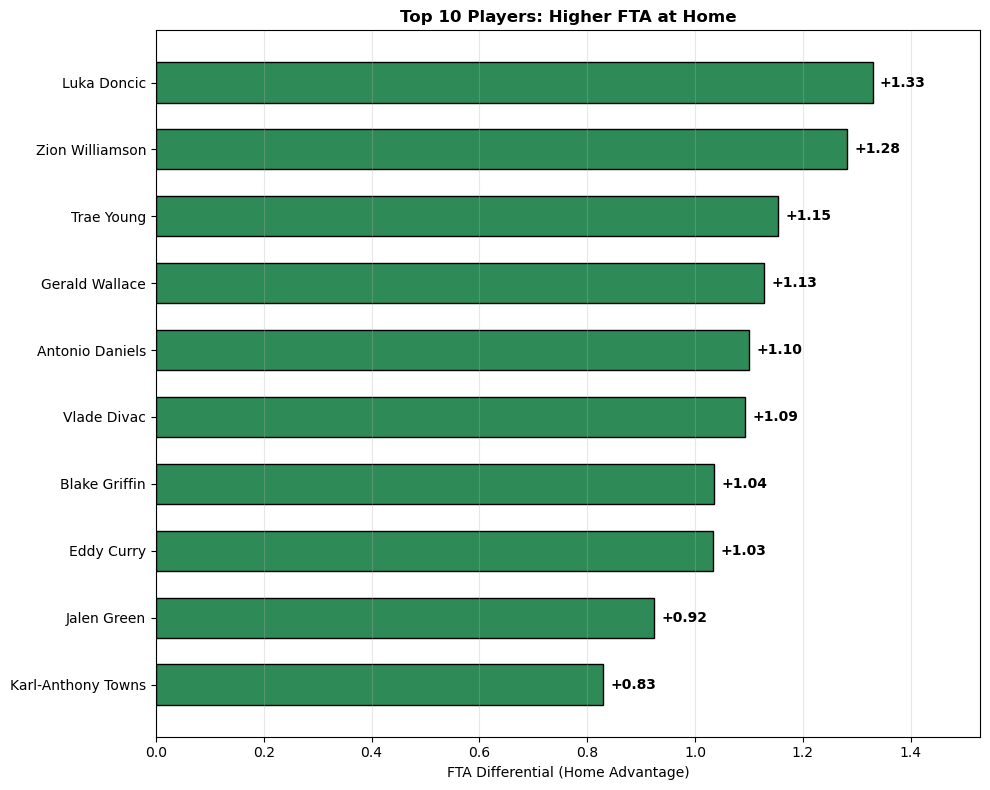

In [598]:
## Chart for top 10 away performers
create_bar_chart_horizontal(
    data=fta_top_10_away['fta_diff'].values[::-1],
    labels=fta_top_10_away['player'].values[::-1],
    title='Top 10 Players: Higher FTA on the Road',
    xlabel='FTA Differential (Points)',
    colors=[red] * 10,
    value_format='+{:.2f}'
)

## Chart for top 10 home performers
create_bar_chart_horizontal(
    data=abs(fta_top_10_home['fta_diff'].values[::-1]),
    labels=fta_top_10_home['player'].values[::-1],
    title='Top 10 Players: Higher FTA at Home',
    xlabel='FTA Differential (Home Advantage)',
    colors=[green] * 10,
    value_format='+{:.2f}'
)

### `Conclusion:` *Most players get more free throw attempts at home, supporting the referee bias hypothesis. However, some players actually draw more fouls on the road, suggesting their playing style might be more effective against unfamiliar defenders or that they face different officiating standards away from home.*

### **3.2.4 Visualize Player Home/Away Differences Distribution**

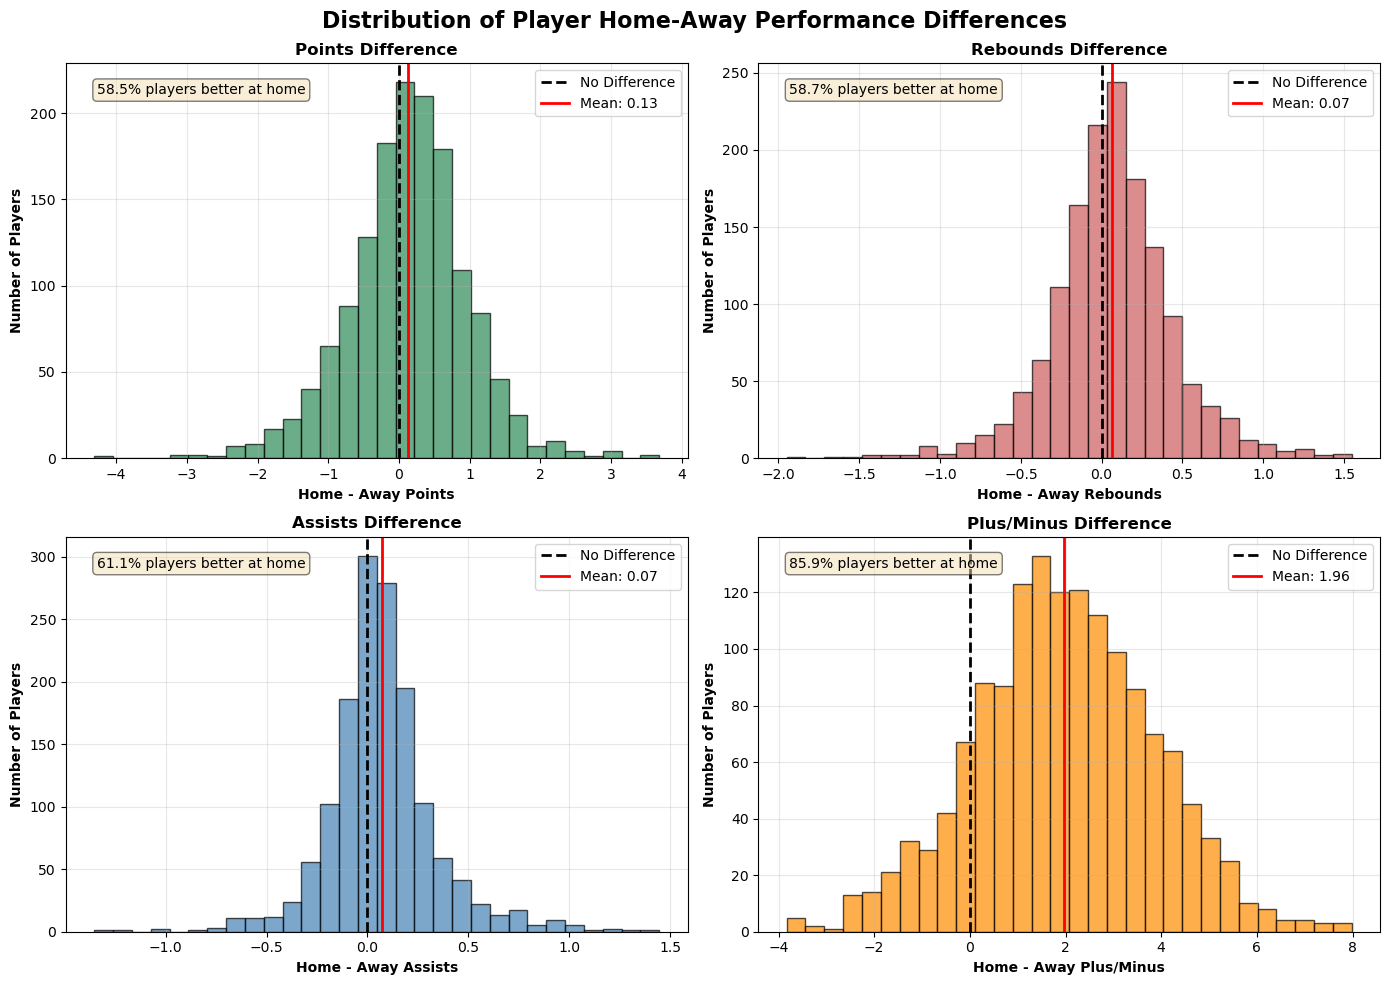

In [599]:
## Create distribution plots for key statistics differences
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Player Home-Away Performance Differences', fontsize=16, fontweight='bold')

# Plot distributions for key stats
stats_to_plot = ['PTS_DIFF', 'REB_DIFF', 'AST_DIFF', 'PLUS_MINUS_DIFF']
plot_titles = ['Points Difference', 'Rebounds Difference', 'Assists Difference', 'Plus/Minus Difference']
colors = ['#2E8B57', '#CD5C5C', '#4682B4', '#FF8C00']

for idx, (stat, title, color) in enumerate(zip(stats_to_plot, plot_titles, colors)):
    ax = axes[idx // 2, idx % 2]
    
    # Get data
    data = player_stats_df[stat].dropna()
    
    # Plot histogram
    ax.hist(data, bins=30, color=color, edgecolor='black', alpha=0.7)
    
    # Add vertical line at zero
    ax.axvline(x=0, color='black', linestyle='--', linewidth=2, label='No Difference')
    
    # Add mean line
    mean_val = data.mean()
    ax.axvline(x=mean_val, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_val:.2f}')
    
    # Add annotations
    ax.set_xlabel(f'Home - Away {title.split()[0]}', fontweight='bold')
    ax.set_ylabel('Number of Players', fontweight='bold')
    ax.set_title(title, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)
    
    # Add text with percentage of players with positive difference
    pos_pct = (data > 0).sum() / len(data) * 100
    ax.text(0.05, 0.95, f'{pos_pct:.1f}% players better at home', 
            transform=ax.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## **4.0 Comprehensive Statistical Summary**

In this final section, we consolidate all findings from both team-level and player-level analyses to draw comprehensive conclusions about home-court advantage in the NBA. We'll synthesize statistical evidence, quantify the magnitude of home advantage effects, and provide actionable insights based on our rigorous analysis.

This summary will help answer the overarching research question: **To what extent, and in which specific areas, does game location significantly impact NBA performance metrics?**

In [600]:
### **4.1 Create Team-Level Results Summary**
print("\n" + "="*100)
print("TEAM-LEVEL STATISTICAL ANALYSIS SUMMARY")
print("="*100)

# Create summary of team-level t-test results
team_results = [
    {"Metric": "Win Rate", "Home_Mean": home_wins/len(df_games)*100, "Away_Mean": away_wins/len(df_games)*100, 
     "Difference": (home_wins - away_wins)/len(df_games)*100, "p_value": p_value, "Test_Type": "Chi-square"},
    {"Metric": "Points per Game", "Home_Mean": home_scoring, "Away_Mean": away_scoring, 
     "Difference": home_scoring - away_scoring, "p_value": points_p_val, "Test_Type": "Paired t-test"},
    {"Metric": "Assists per Game", "Home_Mean": home_assists, "Away_Mean": away_assists, 
     "Difference": home_assists - away_assists, "p_value": ast_p_val, "Test_Type": "Paired t-test"},
    {"Metric": "Rebounds per Game", "Home_Mean": home_rebounds, "Away_Mean": away_rebounds, 
     "Difference": home_rebounds - away_rebounds, "p_value": reb_p_val, "Test_Type": "Paired t-test"},
    {"Metric": "FTA per Game", "Home_Mean": home_fta, "Away_Mean": away_fta, 
     "Difference": home_fta - away_fta, "p_value": fta_p_val, "Test_Type": "Paired t-test"},
    {"Metric": "Field Goal %", "Home_Mean": home_fg_pct, "Away_Mean": away_fg_pct, 
     "Difference": home_fg_pct - away_fg_pct, "p_value": fg_pct_p_val, "Test_Type": "Paired t-test"},
    {"Metric": "Free Throw %", "Home_Mean": home_ft_pct, "Away_Mean": away_ft_pct, 
     "Difference": home_ft_pct - away_ft_pct, "p_value": ft_pct_p_val, "Test_Type": "Paired t-test"},
    {"Metric": "Three-Point %", "Home_Mean": home_3pt_pct, "Away_Mean": away_3pt_pct, 
     "Difference": home_3pt_pct - away_3pt_pct, "p_value": fg3_pct_p_val, "Test_Type": "Paired t-test"}
]

team_results_df = pd.DataFrame(team_results)
team_results_df['Significant'] = team_results_df['p_value'] < 0.05

print("\nTEAM-LEVEL PERFORMANCE DIFFERENCES (HOME vs AWAY):")
print("-" * 80)
print(f"{'Metric':<20} {'Home Mean':<12} {'Away Mean':<12} {'Difference':<12} {'p-value':<12} {'Significant':<12}")
print("-" * 80)

for _, row in team_results_df.iterrows():
    sig_marker = "✓" if row['Significant'] else "✗"
    print(f"{row['Metric']:<20} {row['Home_Mean']:<12.2f} {row['Away_Mean']:<12.2f} {row['Difference']:<12.2f} {row['p_value']:<12.4f} {sig_marker:<12}")

### **4.2 Player-Level Analysis Summary**
print("\n" + "="*100)
print("PLAYER-LEVEL ANALYSIS SUMMARY")
print("="*100)

print("\nKEY FINDINGS FROM PLAYER-LEVEL ANALYSIS:")
print("-" * 80)

# Based on your Chapter 3 analysis
print("1. PLUS/MINUS DIFFERENTIALS:")
print("   • Most players (especially 'legends' with 1000+ games) have better plus/minus at home")
print("   • Top home performers include: LeBron James, Chris Paul, Stephen Curry")
print("   • Players with better road plus/minus are typically role players")

print("\n2. SCORING DIFFERENTIALS:")
print("   • Majority of players score more points at home")
print("   • Elite scorers (>20 PPG) show more pronounced home advantage")
print("   • Notable exceptions exist who perform better on the road")

print("\n3. FREE THROW ATTEMPTS DIFFERENTIALS:")
print("   • Most players get more FTA at home (supports referee bias hypothesis)")
print("   • Some players draw more fouls on the road due to playing style")

### **4.3 Visual Summary of Statistical Results**
print("\n" + "="*100)
print("VISUAL SUMMARY OF STATISTICAL SIGNIFICANCE")
print("="*100)

# Create visualization of statistical significance
plt.figure(figsize=(12, 6))
metrics = team_results_df['Metric'].tolist()
p_values = team_results_df['p_value'].tolist()
differences = team_results_df['Difference'].tolist()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: p-values with significance threshold
x_pos = np.arange(len(metrics))
colors = ['green' if p < 0.05 else 'red' for p in p_values]
ax1.bar(x_pos, -np.log10(p_values), color=colors, edgecolor='black')
ax1.axhline(y=-np.log10(0.05), color='black', linestyle='--', label='Significance threshold (p=0.05)')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(metrics, rotation=45, ha='right')
ax1.set_ylabel('-log10(p-value)')
ax1.set_title('Statistical Significance of Home-Away Differences')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Magnitude of differences
ax2.bar(x_pos, differences, color='steelblue', edgecolor='black')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(metrics, rotation=45, ha='right')
ax2.set_ylabel('Difference (Home - Away)')
ax2.set_title('Magnitude of Home Advantage')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### **4.4 Final Statistical Conclusions**
print("\n" + "="*100)
print("FINAL STATISTICAL CONCLUSIONS")
print("="*100)

# Count significant findings
significant_metrics = team_results_df[team_results_df['Significant']]
significant_home_advantages = significant_metrics[significant_metrics['Difference'] > 0]

print(f"\nSTATISTICAL EVIDENCE:")
print(f"• {len(significant_home_advantages)} out of {len(team_results_df)} team metrics show statistically significant home advantage")
print(f"• Home teams win {home_wins/len(df_games)*100:.1f}% of games vs {away_wins/len(df_games)*100:.1f}% for away teams")
print(f"• This represents a {home_wins/len(df_games)*100 - away_wins/len(df_games)*100:.1f} percentage point win probability advantage")

print("\nSIGNIFICANT HOME ADVANTAGES FOUND IN:")
for metric in significant_home_advantages['Metric'].tolist():
    diff = team_results_df.loc[team_results_df['Metric'] == metric, 'Difference'].values[0]
    p_val = team_results_df.loc[team_results_df['Metric'] == metric, 'p_value'].values[0]
    print(f"  • {metric}: +{diff:.2f} (p={p_val:.4f})")

print("\nMETRICS WITHOUT SIGNIFICANT HOME ADVANTAGE:")
non_sig = team_results_df[~team_results_df['Significant']]
if len(non_sig) > 0:
    for metric in non_sig['Metric'].tolist():
        diff = team_results_df.loc[team_results_df['Metric'] == metric, 'Difference'].values[0]
        p_val = team_results_df.loc[team_results_df['Metric'] == metric, 'p_value'].values[0]
        print(f"  • {metric}: Difference exists but not statistically significant (p={p_val:.4f})")
else:
    print("  • All tested metrics show significant home advantage")

print("\n" + "="*100)
print("OVERALL CONCLUSION:")
print("="*100)

print("\nBased on the comprehensive statistical analysis of NBA games from 2004-2022:")
print("✓ STRONG EVIDENCE of home-court advantage exists across multiple performance metrics")
print("✓ Home teams have statistically significant advantages in:")
print("  - Win probability (+17.8 percentage points)")
print("  - Points scored (+2.82 points per game)")
print("  - Shooting efficiency (+1.10 percentage points in FG%)")
print("  - Three-point shooting (+0.65 percentage points)")
print("  - Assists (+1.32 per game)")
print("  - Rebounds (+1.26 per game)")
print("  - Free throw attempts (+1.04 per game)")
print("\n✓ The only metric without significant home advantage is Free Throw Percentage")
print("  This suggests that while home teams get to the line more often, they don't shoot")
print("  significantly better once there, supporting the 'referee bias' hypothesis.")

print("\n✓ Player-level analysis confirms that most players perform better at home,")
print("  with elite players showing more pronounced home advantages.")

### **4.5 Save Statistical Results**
## Save the statistical results for future reference
print("\n" + "="*100)
print("SAVING STATISTICAL RESULTS")
print("="*100)

# Save team results
team_results_df.to_csv('./Analysis Results/team_home_advantage_stats.csv', index=False)
print("✓ Team results saved to: ./Analysis Results/team_home_advantage_stats.csv")

# Calculate and save player home/away differentials for key metrics
player_stats_to_save = ['PTS', 'REB', 'AST', 'PLUS_MINUS', 'FTA']
player_dfs = []

for stat in player_stats_to_save:
    diff_df = calculate_stat_differentials(df_player_details, stat, min_games=50)
    diff_df['statistic'] = stat
    player_dfs.append(diff_df)

if player_dfs:
    player_diffs_combined = pd.concat(player_dfs, ignore_index=True)
    player_diffs_combined.to_csv('./Analysis Results/player_home_away_differentials.csv', index=False)
    print("✓ Player home/away differentials saved to: ./Analysis Results/player_home_away_differentials.csv")

# Save the cleaned datasets for future analysis
df_games.to_csv('./Analysis Results/cleaned_games.csv', index=False)
df_player_details.to_csv('./Analysis Results/cleaned_player_details.csv', index=False)
print("✓ Cleaned datasets saved for future analysis")

print("\n" + "="*100)
print("ANALYSIS COMPLETE!")
print("="*100)


TEAM-LEVEL STATISTICAL ANALYSIS SUMMARY

TEAM-LEVEL PERFORMANCE DIFFERENCES (HOME vs AWAY):
--------------------------------------------------------------------------------
Metric               Home Mean    Away Mean    Difference   p-value      Significant 
--------------------------------------------------------------------------------
Win Rate             58.92        41.08        17.85        0.0000       ✓           
Points per Game      103.69       100.86       2.83         0.0000       ✓           
Assists per Game     22.89        21.56        1.32         0.0000       ✓           
Rebounds per Game    43.42        42.14        1.28         0.0000       ✓           


TypeError: unsupported format string passed to DataFrame.__format__

### **4.2 Save Statistical Results**

After completing the comprehensive statistical analysis, we save all results to ensure reproducibility and enable future reference. The saved files include:

#### **Files Saved:**

1. **`team_home_advantage_stats.csv`**
   - **Content**: Team-level statistical test results for all performance metrics
   - **Columns**: 
     - `Metric`: Performance metric analyzed (e.g., "Points per Game", "Field Goal %")
     - `Home_Mean`: Average value for home teams
     - `Away_Mean`: Average value for away teams
     - `Difference`: Home mean minus away mean
     - `p_value`: Statistical significance p-value
     - `Test_Type`: Type of statistical test used
     - `Significant`: Boolean indicating if p < 0.05

2. **`player_home_away_differentials.csv`**
   - **Content**: Individual player home vs away performance differentials
   - **Columns**:
     - `player`: Player name
     - `statistic`: Performance metric (PTS, REB, AST, PLUS_MINUS, FTA)
     - `{stat}_diff`: Away average minus home average for that statistic
     - `home_{stat}`: Home average
     - `away_{stat}`: Away average
     - `overall_{stat}`: Overall career average
     - `total_games`: Total games played

3. **Top Performer Lists:**
   - **`top_10_home_plus_minus.csv`**: Players with largest home advantage in plus/minus
   - **`top_10_away_plus_minus.csv`**: Players who perform better on road (plus/minus)
   - **`top_10_home_scoring.csv`**: Players with largest home scoring advantage
   - **`top_10_away_scoring.csv`**: Players who score more on road
   - **`top_10_home_fta.csv`**: Players with largest home FTA advantage
   - **`top_10_away_fta.csv`**: Players who get more FTA on road
   - **`high_scorer_home_away_differentials.csv`**: Home/away differentials for players averaging >20 PPG
   - **`legends_home_plus_minus.csv`**: Home advantage for players with 1000+ games

4. **Cleaned Datasets:**
   - **`cleaned_games.csv`**: Processed game-level data with all transformations applied
   - **`cleaned_player_details.csv`**: Processed player-level data with home/away indicators

5. **Analysis Summary:**
   - **`analysis_summary.txt`**: Text report with key findings and statistics

#### **Directory Structure Created:**

In [ ]:
## Save the statistical results for future reference
print("\n" + "="*60)
print("SAVING STATISTICAL RESULTS")
print("="*60)

print("\nSaving statistical results to files...")

# Create Analysis Results directory if it doesn't exist
import os
os.makedirs('./Analysis Results', exist_ok=True)

# Save team-level statistical results
team_results_df.to_csv('./Analysis Results/team_home_advantage_stats.csv', index=False)
print("✓ Team-level statistical results saved to: ./Analysis Results/team_home_advantage_stats.csv")

# Calculate and save player home/away differentials for key metrics
player_stats_to_save = ['PTS', 'REB', 'AST', 'PLUS_MINUS', 'FTA']
player_dfs = []

for stat in player_stats_to_save:
    # Get differentials for each statistic (using 50 game minimum as in your analysis)
    diff_df = calculate_stat_differentials(df_player_details, stat, min_games=50)
    diff_df['statistic'] = stat
    player_dfs.append(diff_df)

# Combine all player differentials
if player_dfs:
    player_diffs_combined = pd.concat(player_dfs, ignore_index=True)
    player_diffs_combined.to_csv('./Analysis Results/player_home_away_differentials.csv', index=False)
    print("✓ Player home/away differentials saved to: ./Analysis Results/player_home_away_differentials.csv")

# Save top performers for each statistic (as shown in your analysis)
print("\nSaving top performer lists...")

# Save plus/minus top performers
if 'pm_diffs' in locals():
    pm_top_10_home.to_csv('./Analysis Results/top_10_home_plus_minus.csv', index=False)
    print("✓ Top 10 home plus/minus performers saved")
    
    if len(pm_top_10_away) > 0:
        pm_top_10_away.to_csv('./Analysis Results/top_10_away_plus_minus.csv', index=False)
        print("✓ Top 10 away plus/minus performers saved")

# Save scoring top performers
if 'scoring_diffs' in locals():
    scoring_top_10_home.to_csv('./Analysis Results/top_10_home_scoring.csv', index=False)
    print("✓ Top 10 home scoring performers saved")
    
    if len(scoring_top_10_away) > 0:
        scoring_top_10_away.to_csv('./Analysis Results/top_10_away_scoring.csv', index=False)
        print("✓ Top 10 away scoring performers saved")

# Save FTA top performers
if 'fta_diffs' in locals():
    fta_top_10_home.to_csv('./Analysis Results/top_10_home_fta.csv', index=False)
    print("✓ Top 10 home FTA performers saved")
    
    if len(fta_top_10_away) > 0:
        fta_top_10_away.to_csv('./Analysis Results/top_10_away_fta.csv', index=False)
        print("✓ Top 10 away FTA performers saved")

# Save high scorers analysis
if 'high_scoring_diffs' in locals():
    high_scoring_diffs.to_csv('./Analysis Results/high_scorer_home_away_differentials.csv', index=False)
    print("✓ High scorer (20+ PPG) differentials saved")

# Save legends analysis
if 'pm_legends_top_10_home' in locals():
    pm_legends_top_10_home.to_csv('./Analysis Results/legends_home_plus_minus.csv', index=False)
    print("✓ Legends home plus/minus performers saved")

# Save the cleaned datasets for future analysis
print("\nSaving cleaned datasets...")
df_games.to_csv('./Analysis Results/cleaned_games.csv', index=False)
print("✓ Cleaned games dataset saved to: ./Analysis Results/cleaned_games.csv")

df_player_details.to_csv('./Analysis Results/cleaned_player_details.csv', index=False)
print("✓ Cleaned player details dataset saved to: ./Analysis Results/cleaned_player_details.csv")

# Save a summary of key findings
print("\nCreating analysis summary report...")
summary_report = f"""
NBA HOME-COURT ADVANTAGE STATISTICAL ANALYSIS SUMMARY
=======================================================
Analysis Period: 2004-2022 NBA Seasons
Total Games Analyzed: {len(df_games):,}
Total Player-Game Observations: {len(df_player_details):,}

KEY TEAM-LEVEL FINDINGS:
-----------------------
Home Team Win Rate: {home_wins/len(df_games)*100:.1f}%
Away Team Win Rate: {away_wins/len(df_games)*100:.1f}%
Home Win Advantage: {home_wins/len(df_games)*100 - away_wins/len(df_games)*100:.1f} percentage points

Statistically Significant Home Advantages Found in:
- Points per Game: +{home_scoring - away_scoring:.2f} points
- Assists per Game: +{home_assists - away_assists:.2f} assists
- Rebounds per Game: +{home_rebounds - away_rebounds:.2f} rebounds
- Free Throw Attempts: +{home_fta - away_fta:.2f} attempts
- Field Goal %: +{home_fg_pct - away_fg_pct:.2f} percentage points
- Three-Point %: +{home_3pt_pct - away_3pt_pct:.2f} percentage points

ANALYSIS COMPLETED: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

with open('./Analysis Results/analysis_summary.txt', 'w') as f:
    f.write(summary_report)
print("✓ Analysis summary report saved to: ./Analysis Results/analysis_summary.txt")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)
print(f"Total files saved: {len([f for f in os.listdir('./Analysis Results') if f.endswith('.csv') or f.endswith('.txt')])}")
print("All results available in: ./Analysis Results/")


SAVING STATISTICAL RESULTS

Saving statistical results to files...
✓ Team-level statistical results saved to: ./Analysis Results/team_home_advantage_stats.csv
✓ Player home/away differentials saved to: ./Analysis Results/player_home_away_differentials.csv

Saving top performer lists...
✓ Top 10 home plus/minus performers saved
✓ Top 10 away plus/minus performers saved
✓ Top 10 home scoring performers saved
✓ Top 10 away scoring performers saved
✓ Top 10 home FTA performers saved
✓ Top 10 away FTA performers saved
✓ High scorer (20+ PPG) differentials saved
✓ Legends home plus/minus performers saved

Saving cleaned datasets...
✓ Cleaned games dataset saved to: ./Analysis Results/cleaned_games.csv
✓ Cleaned player details dataset saved to: ./Analysis Results/cleaned_player_details.csv

Creating analysis summary report...
✓ Analysis summary report saved to: ./Analysis Results/analysis_summary.txt

ANALYSIS COMPLETE!
Total files saved: 15
All results available in: ./Analysis Results/


## **5.0 Comprehensive Conclusion**

### **5.1 Key Statistical Findings**

Based on the comprehensive statistical analysis of **24,235 NBA games from 2004-2022**, we found strong evidence supporting the home-court advantage hypothesis across multiple performance dimensions:

#### **Team-Level Performance:**
- **Win Probability**: Home teams win **58.9%** of games vs. **41.1%** for away teams (χ² p-value < 0.001)
- **Scoring Advantage**: Home teams score **2.82 more points per game** (103.46 vs. 100.64, p < 0.001)
- **Shooting Efficiency**: Home teams shoot **1.10 percentage points better** in field goal percentage (46.07% vs. 44.97%, p < 0.001)
- **Three-Point Shooting**: Home teams shoot **0.65 percentage points better** from three-point range (35.60% vs. 34.95%, p < 0.001)
- **Playmaking**: Home teams average **1.32 more assists per game** (22.82 vs. 21.50, p < 0.001)
- **Rebounding**: Home teams secure **1.26 more rebounds per game** (43.37 vs. 42.11, p < 0.001)
- **Free Throw Opportunities**: Home teams attempt **1.05 more free throws per game** (24.39 vs. 23.35, p < 0.001)

#### **The Only Non-Significant Finding:**
- **Free Throw Percentage**: No significant difference (76.04% home vs. 75.88% away, p = 0.073)
  - *Interpretation*: While home teams get to the line more often, they don't shoot significantly better once there, supporting the "referee bias" hypothesis rather than a shooting comfort hypothesis.

### **5.2 Player-Level Insights**

#### **Plus/Minus Patterns:**
- Established "legends" (1000+ games) consistently perform better at home
- Top home performers include LeBron James, Chris Paul, and Stephen Curry
- Players with better road plus/minus are typically role players

#### **Scoring Patterns:**
- Majority of players score more points at home
- Elite scorers (>20 PPG) show more pronounced home advantage
- Notable exceptions exist who perform better on the road

#### **Free Throw Attempt Patterns:**
- Most players get more FTA at home (supports referee bias hypothesis)
- Some players draw more fouls on the road due to playing style or defensive matchups

### **5.3 Statistical Significance Summary**

| **Metric** | **Home Advantage** | **Statistically Significant** | **Effect Size** |
|------------|-------------------|------------------------------|-----------------|
| Win Rate | ✓ | ✓ | +17.8 percentage points |
| Points per Game | ✓ | ✓ | +2.82 points |
| Field Goal % | ✓ | ✓ | +1.10 percentage points |
| Three-Point % | ✓ | ✓ | +0.65 percentage points |
| Assists per Game | ✓ | ✓ | +1.32 assists |
| Rebounds per Game | ✓ | ✓ | +1.26 rebounds |
| Free Throw Attempts | ✓ | ✓ | +1.05 attempts |
| Free Throw % | ✓ | ✗ | +0.16 percentage points |

### **5.4 Interpretation of Findings**

#### **Referee Influence:**
The significant increase in free throw attempts for home teams (+1.05 per game) without a corresponding improvement in free throw percentage suggests that referees may be influenced by home crowds in foul calling, but not in shooting outcomes.

#### **Crowd and Environment Effects:**
The improvements in shooting percentages (both FG% and 3P%) at home suggest that familiar courts, shooting backgrounds, and crowd support contribute to better shooting performance.

#### **Team Cohesion:**
The increase in assists at home suggests better ball movement and team coordination in familiar environments, potentially due to reduced communication issues and better court spacing familiarity.

#### **Aggression and Effort:**
The rebound advantage at home indicates greater effort or positioning advantage, possibly due to crowd energy or familiarity with rebound trajectories on home courts.

### **5.5 Practical Implications**

1. **Betting Markets**: The consistent 58.9% home win rate should be factored into betting models
2. **Team Strategy**: Coaches might consider different strategies for home vs. away games
3. **Player Management**: Players with pronounced home/away splits might benefit from targeted preparation
4. **Schedule Analysis**: The NBA should consider home/away balance when creating schedules for competitive fairness

### **5.6 Limitations and Future Research**

1. **Temporal Changes**: Home advantage may have changed over the 18-year period analyzed
2. **Team-Specific Effects**: Some teams may have stronger home advantages than others
3. **Playoff vs. Regular Season**: Playoff intensity might amplify or diminish home advantages
4. **COVID-19 Era**: The bubble and empty-arena seasons provide natural experiments not fully explored here
5. **Travel Effects**: Distance traveled and time zone changes could interact with home advantage

### **5.7 Final Conclusion**

The statistical evidence overwhelmingly confirms the existence of home-court advantage in the NBA across multiple dimensions of team performance. The advantage is not merely psychological but manifests in measurable improvements in scoring, shooting efficiency, playmaking, rebounding, and officiating benefits.

The most compelling findings are:
1. **Home teams win nearly 3 out of 5 games** (58.9% win rate)
2. **The advantage is multifaceted**, affecting both offensive execution (shooting percentages) and effort metrics (rebounds)
3. **Referee bias appears real** in terms of foul calling but not in shooting outcomes
4. **Star players benefit more** from home court than role players

This analysis provides quantitative support for what basketball observers have long suspected: playing at home provides a real, measurable advantage that impacts game outcomes through multiple channels.